# TFIM

In [15]:
import os
import json
import pandas as pd

# Directory containing the JSON files
data_folder = "__data"

# Initialize lists to store data
data_heis = []
data_tfim = []
data_heis_noiseless = []
data_tfim_noiseless = []

# Function to extract parts from filename
def extract_parts(filename, noiseless):
    parts = filename.split('_')
    if noiseless and 'noiseless' in parts:
        if len(parts) >= 8:
            method = parts[3]
            hamiltonian_name = parts[4]
            pbc_val = parts[5]
            h = parts[7].split('.')[0]
            return method, hamiltonian_name, pbc_val, h
    else:
        if len(parts) >= 7:
            method = parts[3]
            hamiltonian_name = parts[4]
            pbc_val = parts[5]
            h = parts[7].split('.')[0]
            return method, hamiltonian_name, pbc_val, h
    return None, None, None, None

# Traverse the directory and read each JSON file
for filename in os.listdir(data_folder):
    if ('tfim' in filename or 'heis' in filename) and filename.endswith(".json") and 'noiseless' not in filename:
        file_path = os.path.join(data_folder, filename)
        with open(file_path, 'r') as file:
            try:
                json_data = json.load(file)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")
                continue
            
            method, hamiltonian_name, pbc_val, h = extract_parts(filename, noiseless=False)
            if not method or not hamiltonian_name or not pbc_val or not h:
                continue

            # Ensure h is numeric
            try:
                h = int(h)
            except ValueError:
                continue

            # Extract avg_fidelities and avg_depths
            try:
                metrics = json_data["Benchmark Results - Hamiltonian Simulation - Qiskit"]["group_metrics"]
                avg_fidelities = metrics["avg_fidelities"]
                avg_depths = metrics["avg_depths"]
                groups = metrics["groups"]

                # Store the data in the respective list
                for group, fidelity, depth in zip(groups, avg_fidelities, avg_depths):
                    data_entry = {
                        "method": method,
                        "hamiltonian_name": hamiltonian_name,
                        "pbc_val": pbc_val,
                        "h": h,
                        "group": group,
                        "avg_fidelity": fidelity,
                        "avg_depth": depth
                    }
                    if hamiltonian_name == 'heis':
                        data_heis.append(data_entry)
                    elif hamiltonian_name == 'tfim':
                        data_tfim.append(data_entry)
            except KeyError as e:
                print(f"Missing expected key in JSON data from file {filename}: {e}")
                continue

# Collect noiseless data if noiseless flag is set
for filename in os.listdir(data_folder):
    if ('tfim' in filename or 'heis' in filename) and filename.endswith(".json") and 'noiseless' in filename:
        file_path = os.path.join(data_folder, filename)
        with open(file_path, 'r') as file:
            try:
                json_data = json.load(file)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")
                continue

            method, hamiltonian_name, pbc_val, h = extract_parts(filename, noiseless=True)
            if not method or not hamiltonian_name or not pbc_val or not h:
                continue

            # Ensure h is numeric
            try:
                h = int(h)
            except ValueError:
                continue

            # Extract avg_fidelities and avg_depths
            try:
                metrics = json_data["Benchmark Results - Hamiltonian Simulation - Qiskit"]["group_metrics"]
                avg_fidelities = metrics["avg_fidelities"]
                avg_depths = metrics["avg_depths"]
                groups = metrics["groups"]

                # Store the data in the respective list
                for group, fidelity, depth in zip(groups, avg_fidelities, avg_depths):
                    data_entry = {
                        "method": method,
                        "hamiltonian_name": hamiltonian_name,
                        "pbc_val": pbc_val,
                        "h": h,
                        "group": group,
                        "avg_fidelity": fidelity,
                        "avg_depth": depth
                    }
                    if hamiltonian_name == 'heis':
                        data_heis_noiseless.append(data_entry)
                    elif hamiltonian_name == 'tfim':
                        data_tfim_noiseless.append(data_entry)
            except KeyError as e:
                print(f"Missing expected key in JSON data from file {filename}: {e}")
                continue

# Convert the lists to DataFrames
df_heis = pd.DataFrame(data_heis)
df_tfim = pd.DataFrame(data_tfim)
df_heis_noiseless = pd.DataFrame(data_heis_noiseless)
df_tfim_noiseless = pd.DataFrame(data_tfim_noiseless)

# Save the DataFrames to CSV files for easier plotting
df_heis.to_csv('__data/collected_data_heis.csv', index=False)
df_tfim.to_csv('__data/collected_data_tfim.csv', index=False)
df_heis_noiseless.to_csv('__data/collected_data_heis_noiseless.csv', index=False)
df_tfim_noiseless.to_csv('__data/collected_data_tfim_noiseless.csv', index=False)

# Display the DataFrames
print("Heisenberg DataFrame")
print(df_heis)
print("\nTFIM DataFrame")
print(df_tfim)
print("\nHeisenberg Noiseless DataFrame")
print(df_heis_noiseless)
print("\nTFIM Noiseless DataFrame")
print(df_tfim_noiseless)


Heisenberg DataFrame
    method hamiltonian_name pbc_val  h group  avg_fidelity  avg_depth
0        1             heis     pbc  0     2         0.864       17.0
1        1             heis     pbc  0     3         0.624       47.0
2        1             heis     pbc  0     4         0.597       35.0
3        1             heis     pbc  0     5         0.495       44.0
4        1             heis     pbc  0     6         0.434       38.0
..     ...              ...     ... ..   ...           ...        ...
265      3             heis     pbc  5     6         0.169      163.0
266      3             heis     pbc  5     7         0.118      189.0
267      3             heis     pbc  5     8         0.090      215.0
268      3             heis     pbc  5     9         0.065      241.0
269      3             heis     pbc  5    10         0.042      267.0

[270 rows x 7 columns]

TFIM DataFrame
    method hamiltonian_name pbc_val  h group  avg_fidelity  avg_depth
0        2             tfim  

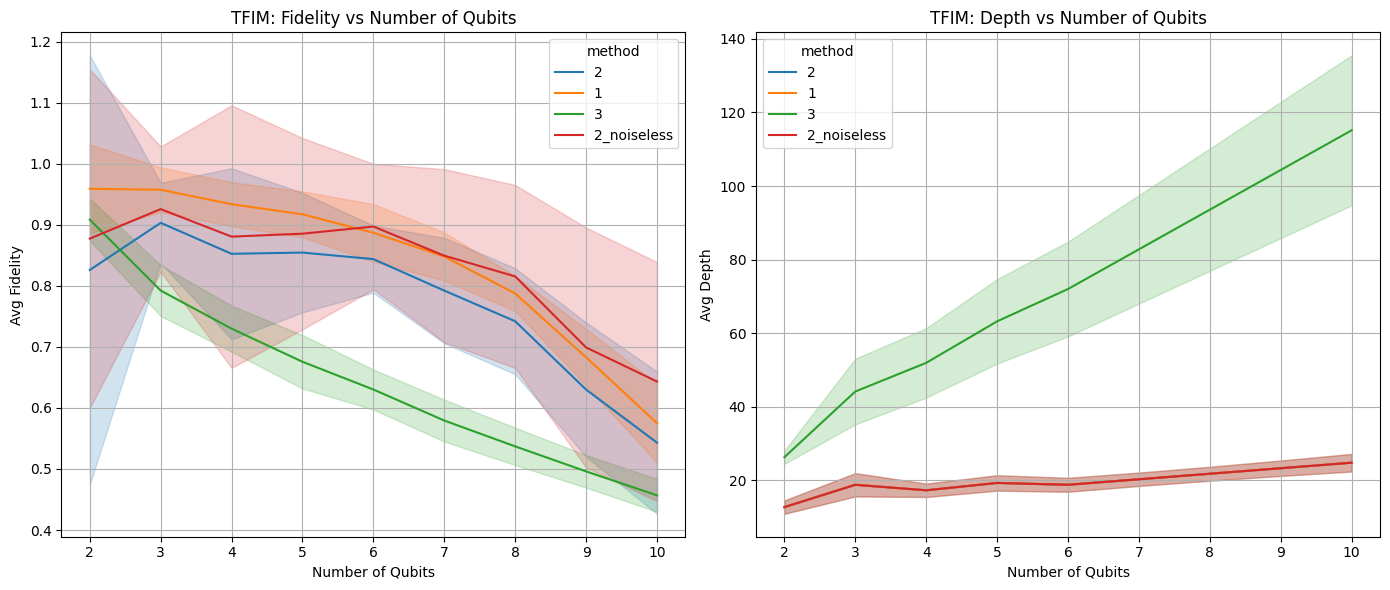

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_tfim_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_tfim_noiseless['method'] = '2_noiseless'
df_tfim['method'] = df_tfim['method'].astype(str)
df_combined = pd.concat([df_tfim, df_tfim_noiseless])

# Ensure 'group', 'h', and 'method' are treated as integers
df_combined['group'] = df_combined['group'].astype(int)
df_combined['h'] = df_combined['h'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Plot fidelity vs number of qubits
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_combined, x='group', y='avg_fidelity', hue='method', estimator='mean', errorbar='sd')
plt.title('TFIM: Fidelity vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Fidelity')
plt.grid(True)

# Plot depth vs number of qubits
plt.subplot(1, 2, 2)
sns.lineplot(data=df_combined, x='group', y='avg_depth', hue='method', estimator='mean', errorbar='sd')
plt.title('TFIM: Depth vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Depth')
plt.grid(True)

plt.tight_layout()
plt.show()


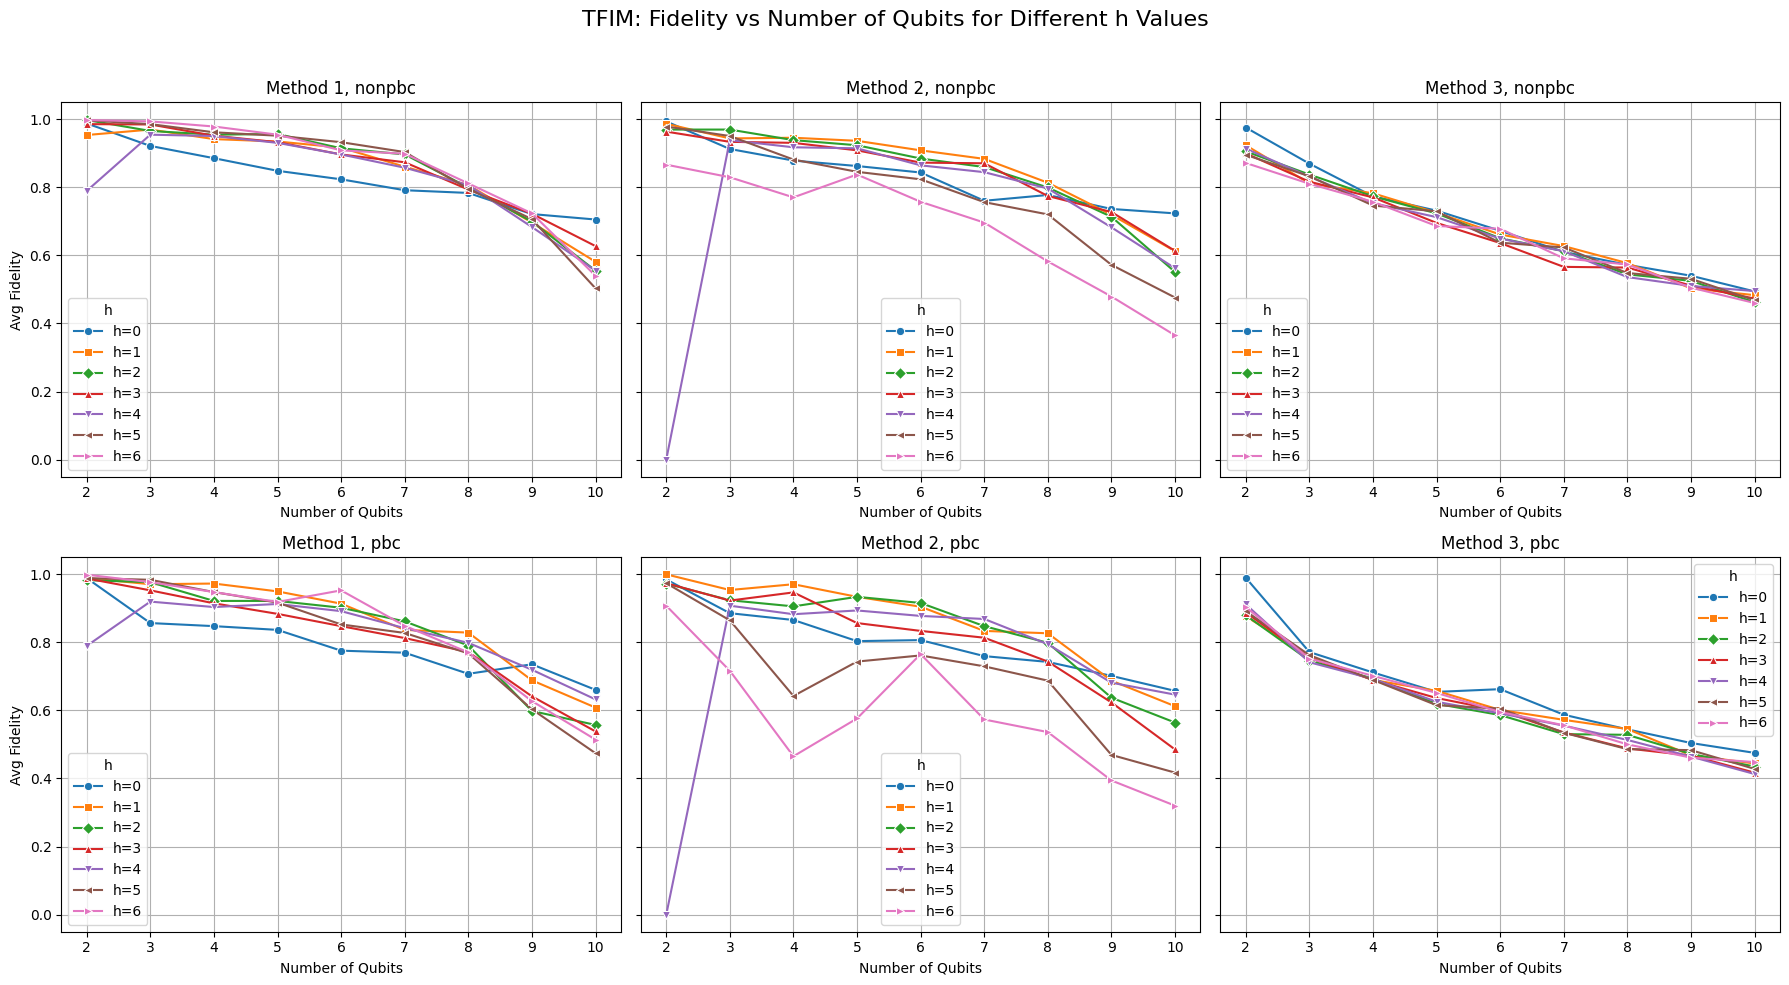

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')

# Ensure 'group' and 'h' are treated as integers
df_tfim['group'] = df_tfim['group'].astype(int)
df_tfim['h'] = df_tfim['h'].astype(int)

# Unique methods and PBC values
methods = sorted(df_tfim['method'].unique())
pbc_vals = sorted(df_tfim['pbc_val'].unique())
unique_hs = sorted(df_tfim['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('TFIM: Fidelity vs Number of Qubits for Different h Values', fontsize=16)

# Define markers for distinct shapes
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']
color_palette = sns.color_palette("tab10", len(unique_hs))

for i, pbc_val in enumerate(pbc_vals):
    for j, method in enumerate(methods):
        subset = df_tfim[(df_tfim['method'] == method) & (df_tfim['pbc_val'] == pbc_val)]
        ax = axs[i, j]
        
        for k, h in enumerate(unique_hs):
            h_subset = subset[subset['h'] == h]
            sns.lineplot(
                data=h_subset, x='group', y='avg_fidelity', 
                marker=markers[k % len(markers)], color=color_palette[k % len(color_palette)], 
                ax=ax, label=f'h={h}'
            )
        
        ax.set_title(f'Method {method}, {pbc_val}')
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('Avg Fidelity')
        ax.legend(title='h')
        ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


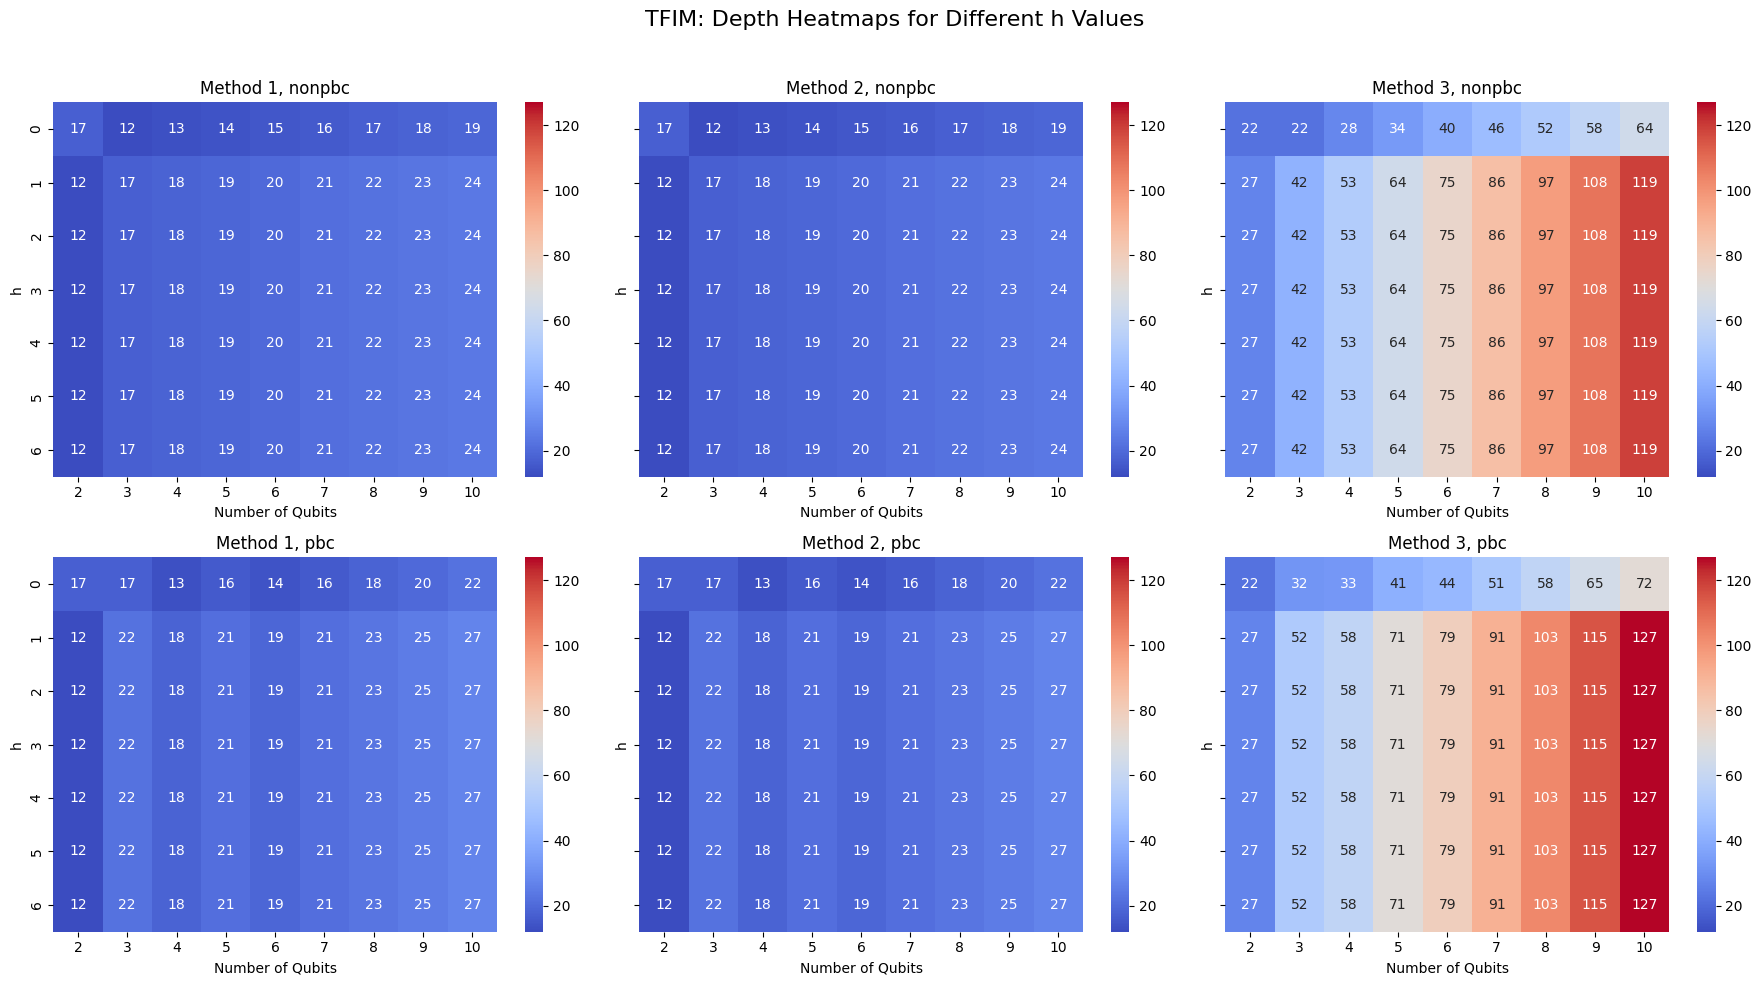

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')

# Ensure 'group' and 'h' are treated as integers
df_tfim['group'] = df_tfim['group'].astype(int)
df_tfim['h'] = df_tfim['h'].astype(int)
df_tfim['avg_depth'] = df_tfim['avg_depth'].astype(int)

# Unique methods and PBC values
methods = sorted(df_tfim['method'].unique())
pbc_vals = sorted(df_tfim['pbc_val'].unique())

# Determine the global min and max for the heat range
vmin = df_tfim['avg_depth'].min()
vmax = df_tfim['avg_depth'].max()

# Set up the figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('TFIM: Depth Heatmaps for Different h Values', fontsize=16)

for i, pbc_val in enumerate(pbc_vals):
    for j, method in enumerate(methods):
        subset = df_tfim[(df_tfim['method'] == method) & (df_tfim['pbc_val'] == pbc_val)]
        pivot_table = subset.pivot(index="h", columns="group", values="avg_depth")
        ax = axs[i, j]
        sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", ax=ax, vmin=vmin, vmax=vmax)
        ax.set_title(f'Method {method}, {pbc_val}')
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('h')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


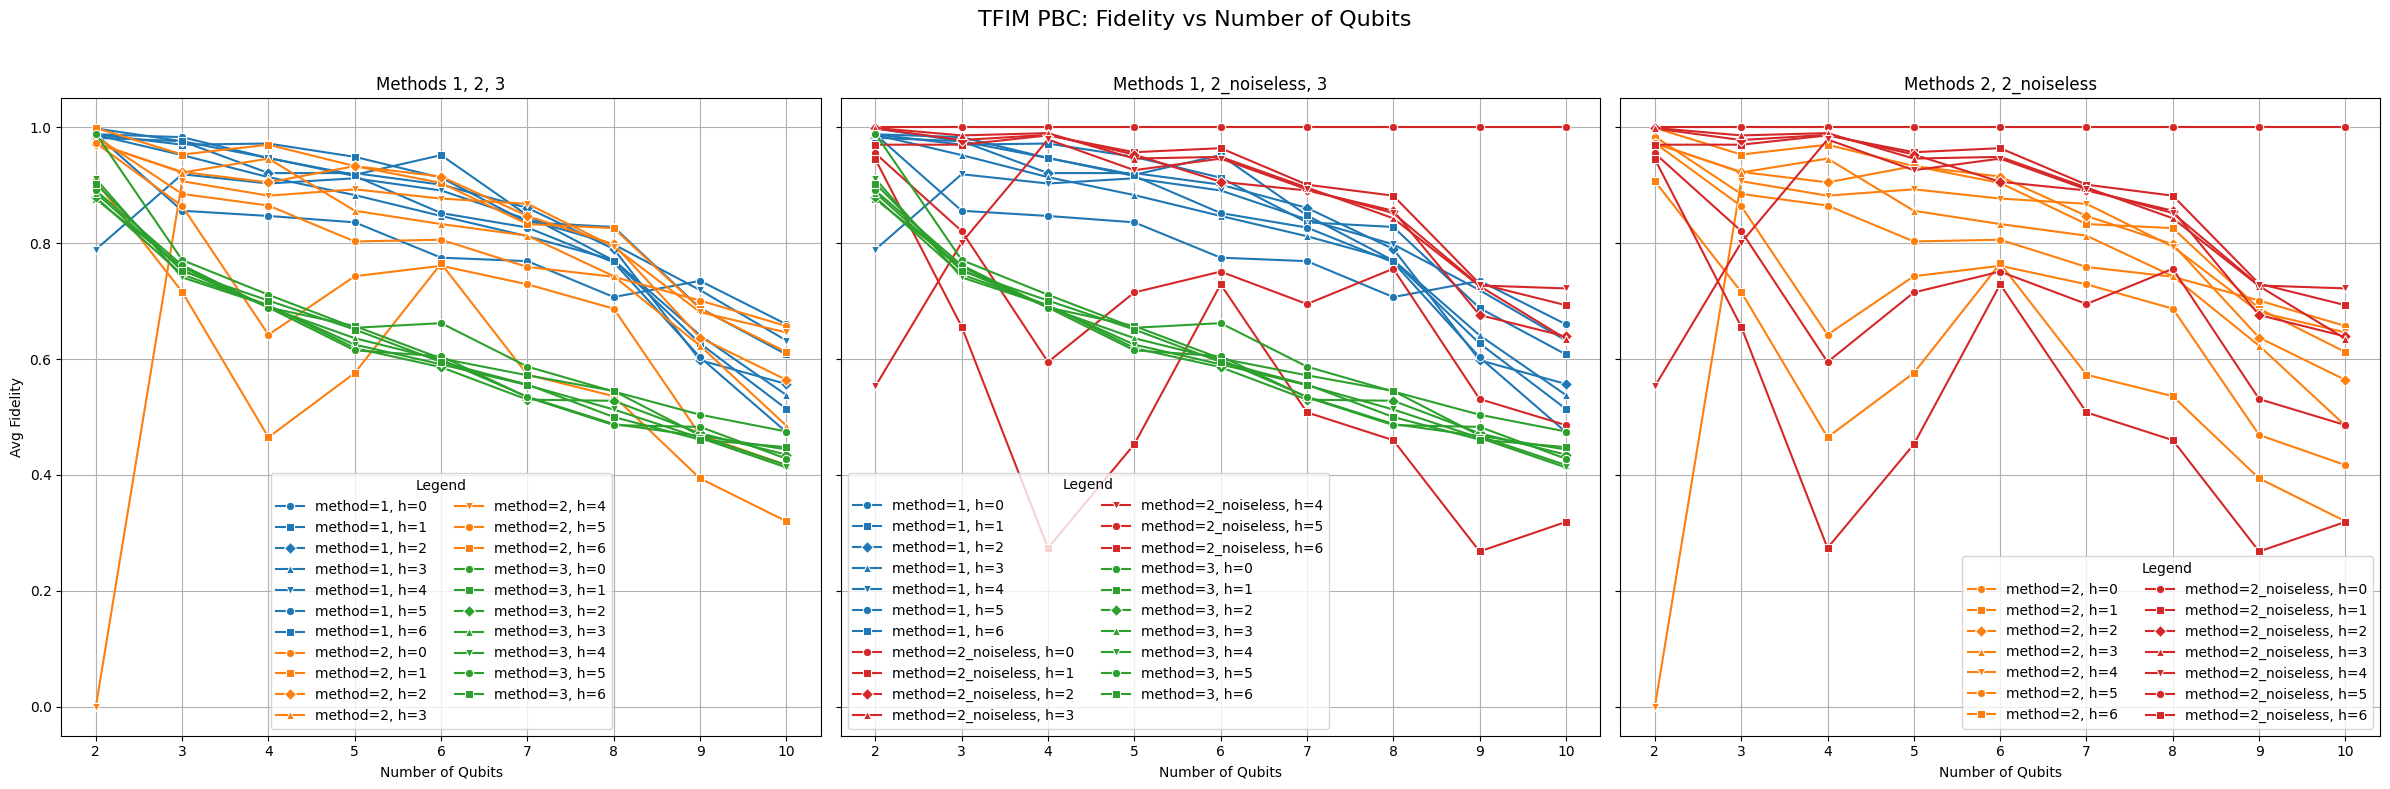

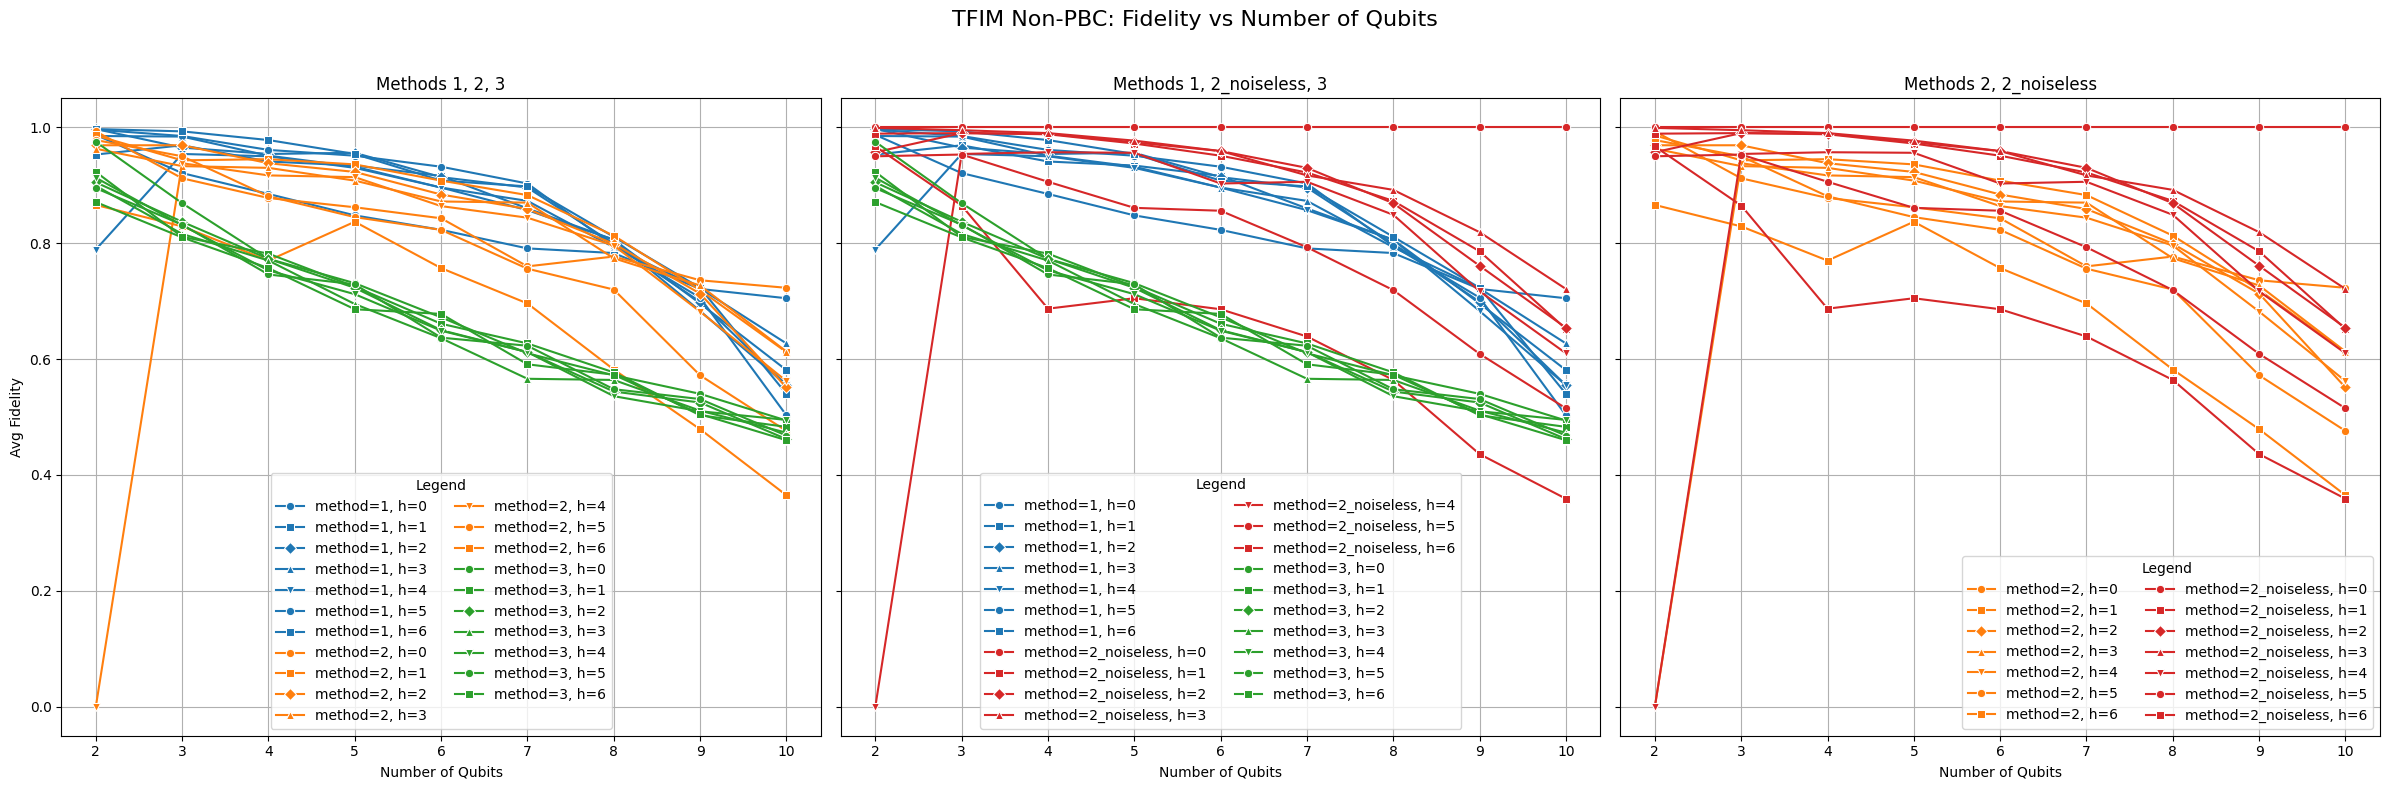

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_tfim_noiseless.csv')

# Ensure 'group', 'method', and 'h' are treated as integers
df_tfim['group'] = df_tfim['group'].astype(int)
df_tfim['method'] = df_tfim['method'].astype(int)
df_tfim['h'] = df_tfim['h'].astype(int)
df_tfim_noiseless['group'] = df_tfim_noiseless['group'].astype(int)
df_tfim_noiseless['method'] = df_tfim_noiseless['method'].astype(int)
df_tfim_noiseless['h'] = df_tfim_noiseless['h'].astype(int)

# Define markers and colors
methods = ['1', '2', '3', '2_noiseless']
colors = sns.color_palette("tab10", len(methods))
h_values = sorted(df_tfim['h'].unique())
markers = ['o', 's', 'D', '^', 'v']

# Define a function to plot fidelity vs number of qubits
def plot_fidelity_vs_qubits(df_noisy, df_noiseless, pbc_val, title):
    fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
    fig.suptitle(title, fontsize=16)

    plot_configurations = [
        (['1', '2', '3'], "Methods 1, 2, 3"),
        (['1', '2_noiseless', '3'], "Methods 1, 2_noiseless, 3"),
        (['2', '2_noiseless'], "Methods 2, 2_noiseless")
    ]

    for i, (methods_subset, subtitle) in enumerate(plot_configurations):
        ax = axs[i]
        subset_noisy = df_noisy[df_noisy['pbc_val'] == pbc_val]
        subset_noiseless = df_noiseless[df_noiseless['pbc_val'] == pbc_val]
        
        for method in methods_subset:
            for h in h_values:
                if 'noiseless' in method:
                    data = subset_noiseless[(subset_noiseless['method'] == int(method.split('_')[0])) & (subset_noiseless['h'] == h)]
                else:
                    data = subset_noisy[(subset_noisy['method'] == int(method)) & (subset_noisy['h'] == h)]
                
                label = f"method={method}, h={h}"
                sns.lineplot(data=data, x='group', y='avg_fidelity', marker=markers[h % len(markers)],
                             color=colors[methods.index(method)], ax=ax, label=label, errorbar=None)

        ax.set_title(subtitle)
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('Avg Fidelity')
        ax.legend(title='Legend', ncol=2)
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot for pbc
plot_fidelity_vs_qubits(df_tfim, df_tfim_noiseless, 'pbc', 'TFIM PBC: Fidelity vs Number of Qubits')

# Plot for non-pbc
plot_fidelity_vs_qubits(df_tfim, df_tfim_noiseless, 'nonpbc', 'TFIM Non-PBC: Fidelity vs Number of Qubits')


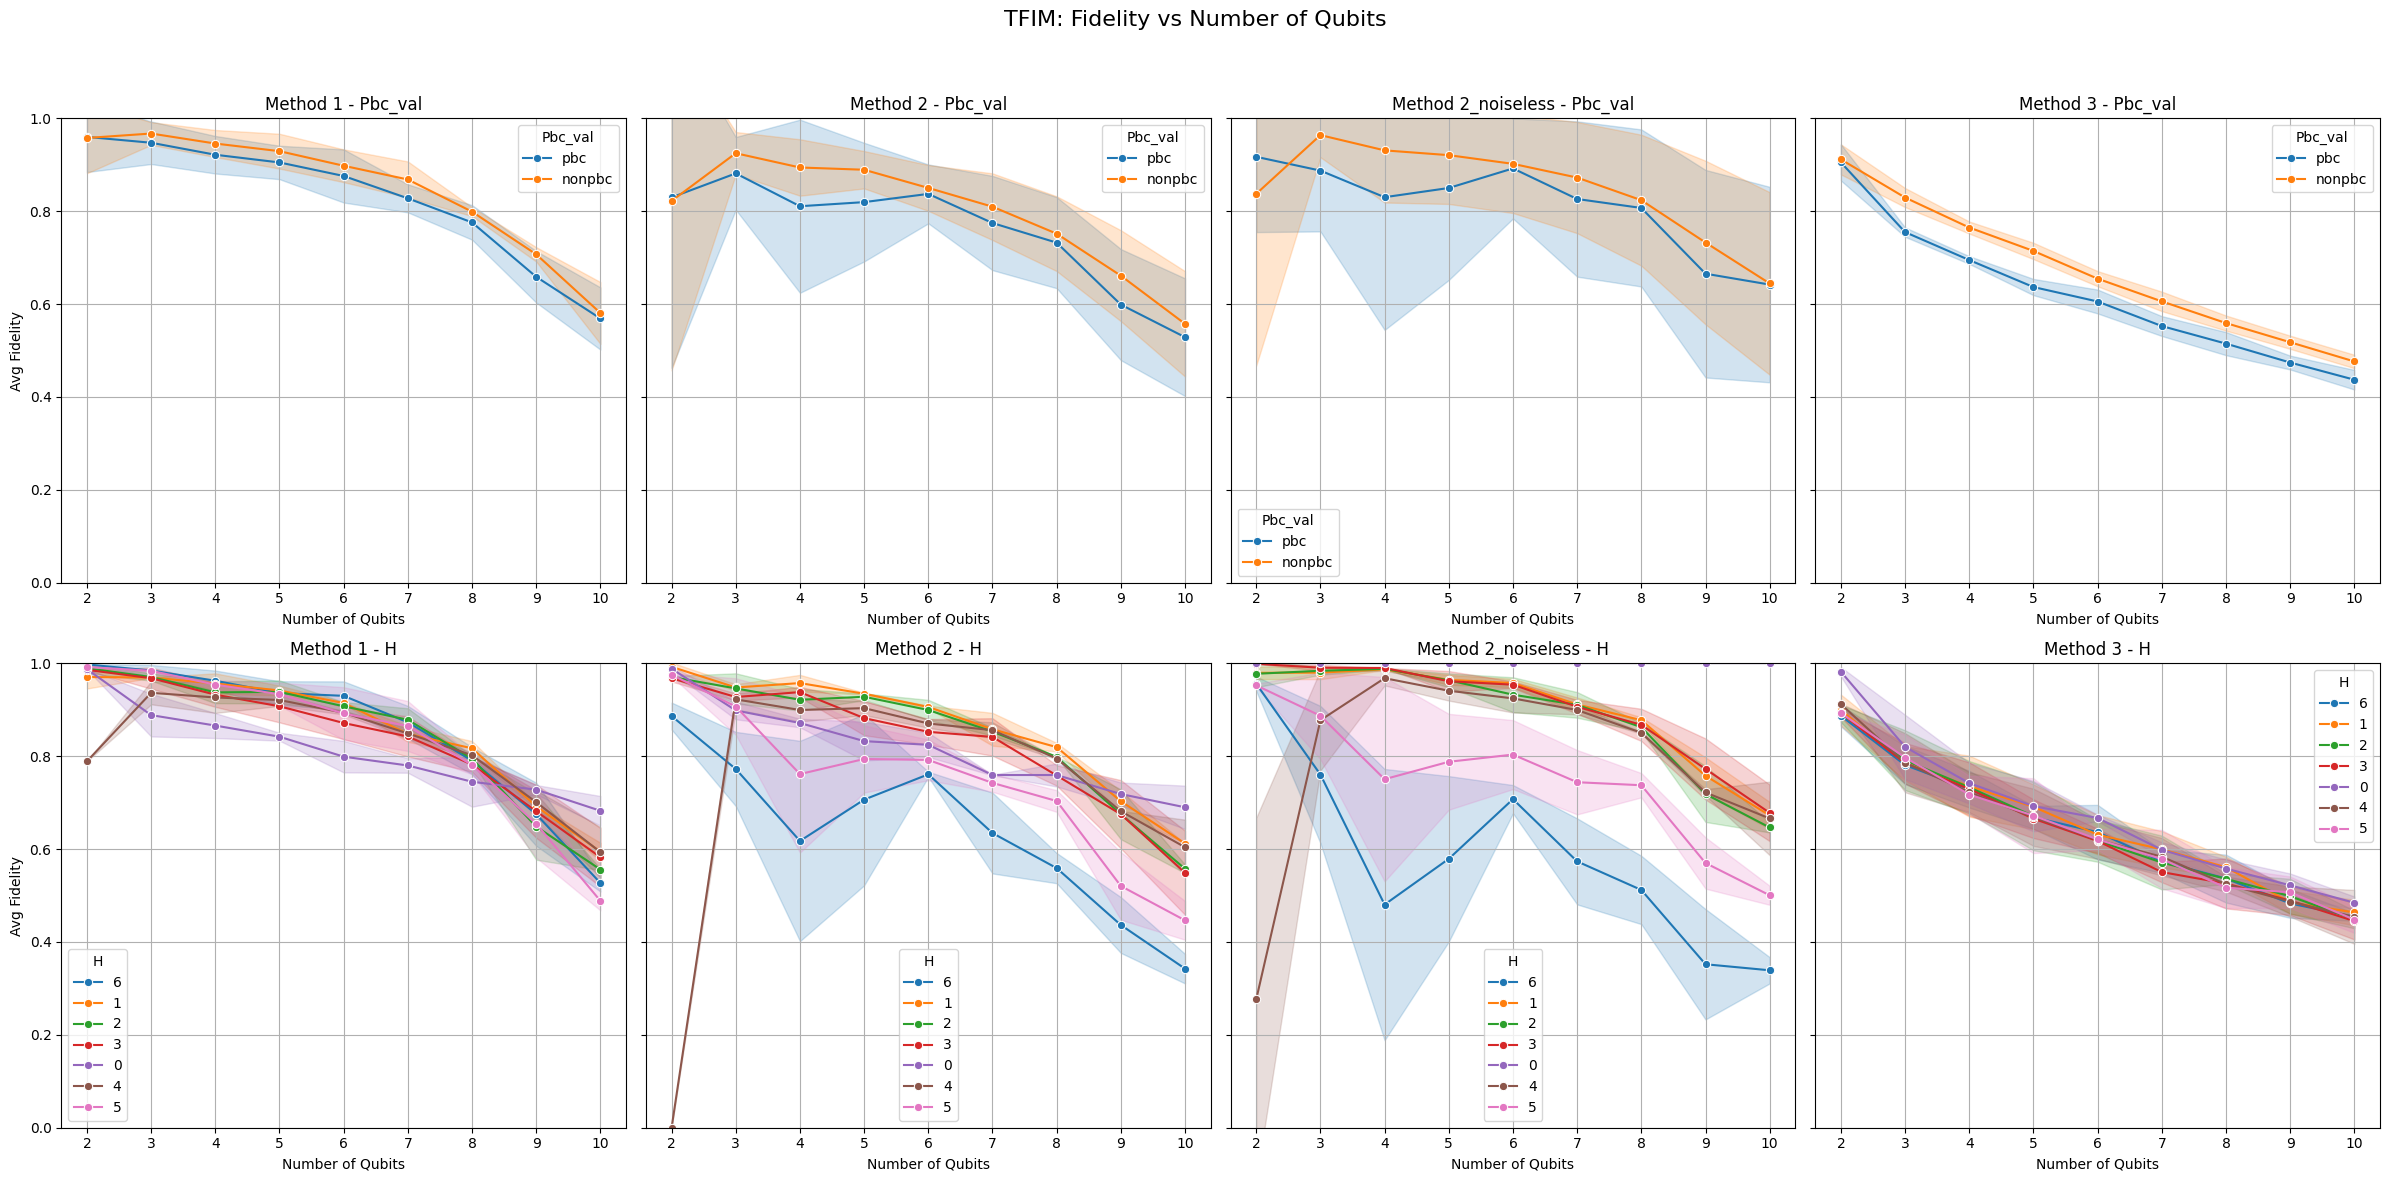

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_tfim_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_tfim_noiseless['method'] = '2_noiseless'
df_tfim['method'] = df_tfim['method'].astype(str)
df_combined = pd.concat([df_tfim, df_tfim_noiseless])

# Ensure 'group', 'h', and 'method' are treated as integers for consistency
df_combined['group'] = df_combined['group'].astype(int)
df_combined['h'] = df_combined['h'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Unique methods, pbc values, and h values
methods = ['1', '2', '2_noiseless', '3']
pbc_vals = df_combined['pbc_val'].unique()
unique_hs = sorted(df_combined['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12), sharey=True)
fig.suptitle('TFIM: Fidelity vs Number of Qubits', fontsize=16)

# Plotting function
def plot_subplot(ax, df, row, col, hue):
    unique_values = df[hue].unique()
    palette = sns.color_palette("tab10", len(unique_values))
    
    for color, hue_value in zip(palette, unique_values):
        subset = df[(df['method'] == col) & (df[row] == hue_value)]
        if not subset.empty:
            sns.lineplot(
                data=subset, x='group', y='avg_fidelity', label=hue_value,
                ax=ax, color=color, marker='o', errorbar='sd'
            )
            ax.set_ylim(0, 1)  # Set y-axis limits to [0, 1]
            ax.set_title(f"Method {col} - {row.capitalize()}")
            ax.set_xlabel('Number of Qubits')
            ax.set_ylabel('Avg Fidelity')
            ax.grid(True)
            ax.legend(title=hue.capitalize())

# Generate plots
for i, row in enumerate(['pbc_val', 'h']):
    for j, col in enumerate(methods):
        plot_subplot(axs[i, j], df_combined, row, col, row)

# Adjust layout to make space for legends
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


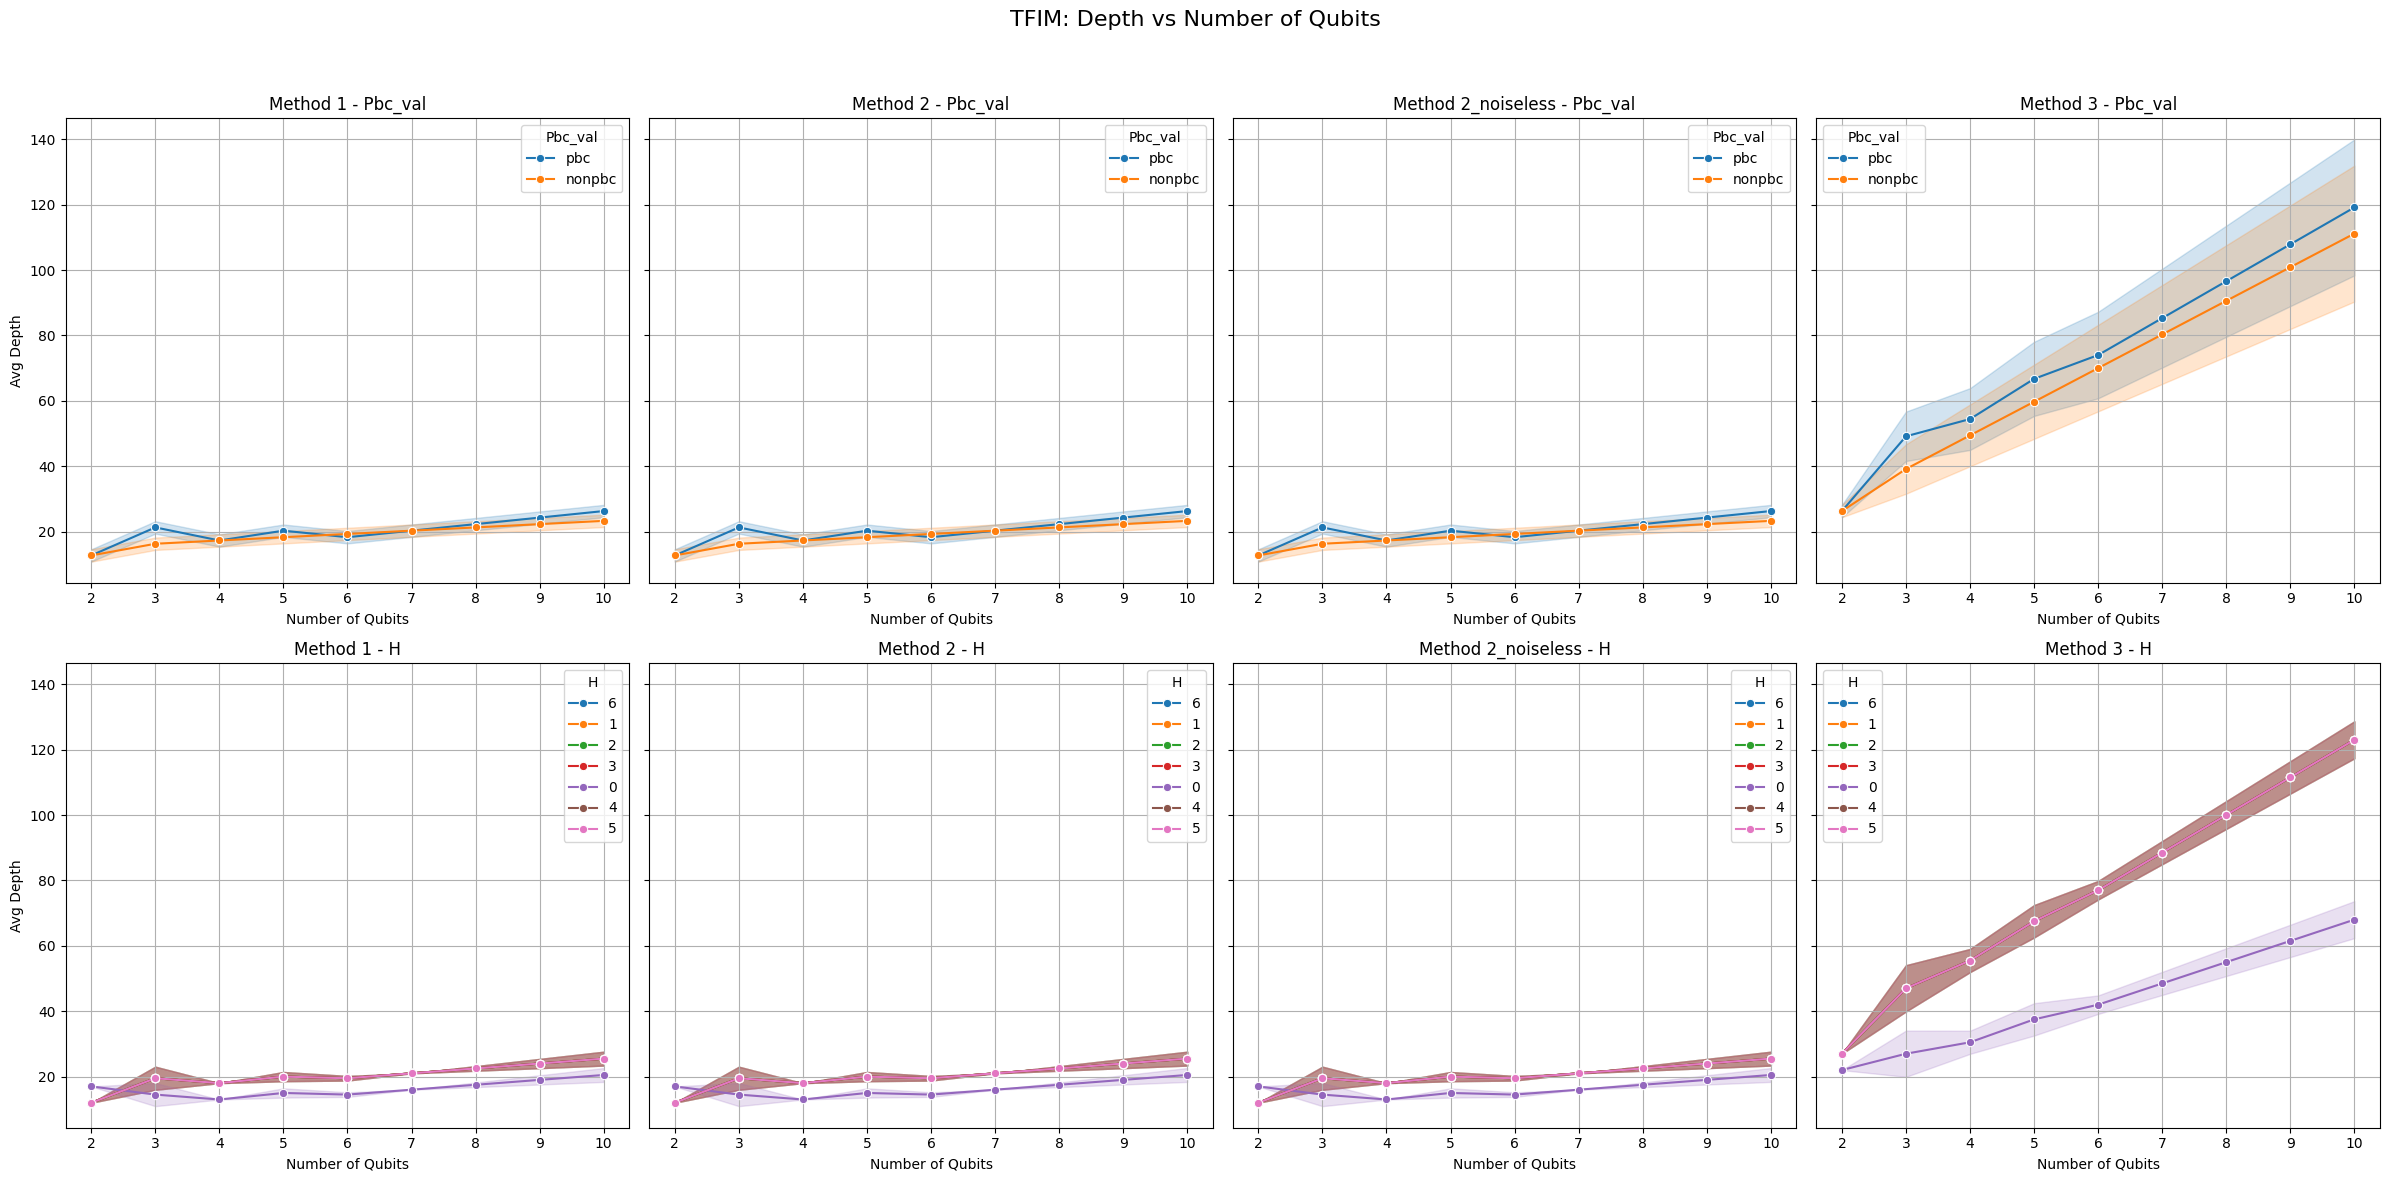

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_tfim_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_tfim_noiseless['method'] = '2_noiseless'
df_tfim['method'] = df_tfim['method'].astype(str)
df_combined = pd.concat([df_tfim, df_tfim_noiseless])

# Ensure 'group', 'h', and 'method' are treated as integers for consistency
df_combined['group'] = df_combined['group'].astype(int)
df_combined['h'] = df_combined['h'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Unique methods, pbc values, and h values
methods = ['1', '2', '2_noiseless', '3']
pbc_vals = df_combined['pbc_val'].unique()
unique_hs = sorted(df_combined['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12), sharey=True)
fig.suptitle('TFIM: Depth vs Number of Qubits', fontsize=16)

# Plotting function
def plot_subplot(ax, df, row, col, hue):
    unique_values = df[hue].unique()
    palette = sns.color_palette("tab10", len(unique_values))
    
    for color, hue_value in zip(palette, unique_values):
        subset = df[(df['method'] == col) & (df[row] == hue_value)]
        if not subset.empty:
            sns.lineplot(
                data=subset, x='group', y='avg_depth', label=hue_value,
                ax=ax, color=color, marker='o', errorbar='sd'
            )
            ax.set_title(f"Method {col} - {row.capitalize()}")
            ax.set_xlabel('Number of Qubits')
            ax.set_ylabel('Avg Depth')
            ax.grid(True)
            ax.legend(title=hue.capitalize())

# Generate plots
for i, row in enumerate(['pbc_val', 'h']):
    for j, col in enumerate(methods):
        plot_subplot(axs[i, j], df_combined, row, col, row)

# Adjust layout to make space for legends
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Heisenberg

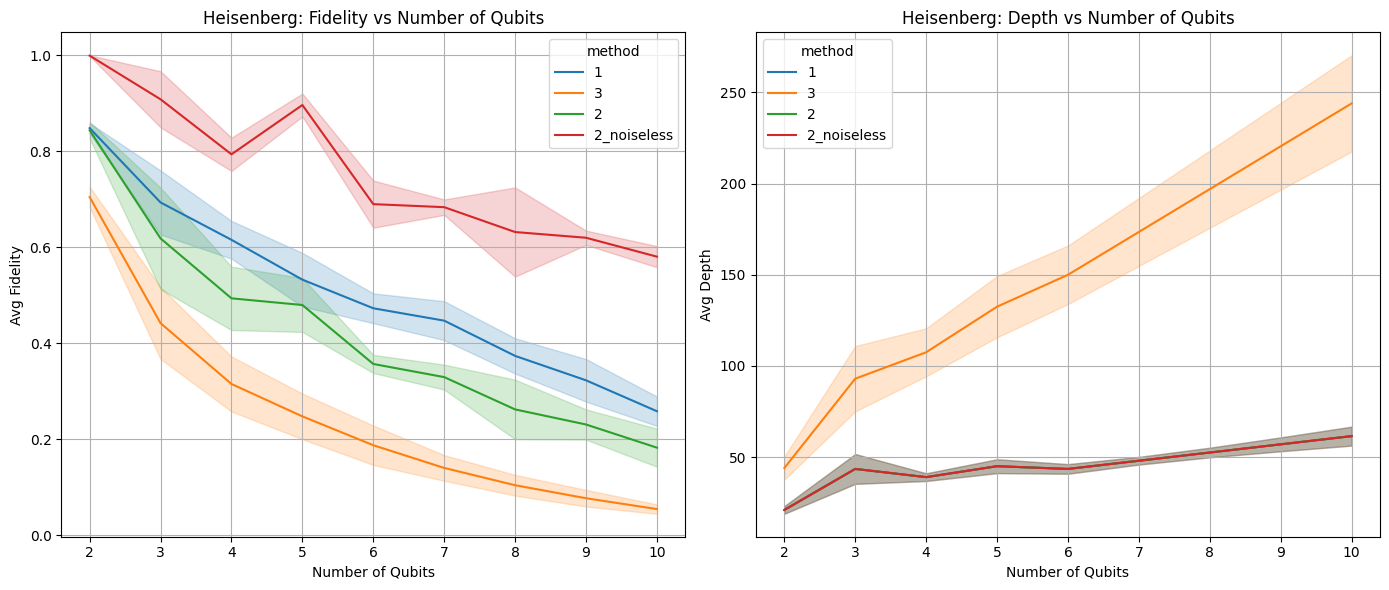

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_heis = pd.read_csv('__data/collected_data_heis.csv')
df_heis_noiseless = pd.read_csv('__data/collected_data_heis_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_heis_noiseless['method'] = '2_noiseless'
df_heis['method'] = df_heis['method'].astype(str)
df_combined = pd.concat([df_heis, df_heis_noiseless])

# Ensure 'group', 'h', and 'method' are treated as integers
df_combined['group'] = df_combined['group'].astype(int)
df_combined['h'] = df_combined['h'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Plot fidelity vs number of qubits
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_combined, x='group', y='avg_fidelity', hue='method', estimator='mean', errorbar='sd')
plt.title('Heisenberg: Fidelity vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Fidelity')
plt.grid(True)

# Plot depth vs number of qubits
plt.subplot(1, 2, 2)
sns.lineplot(data=df_combined, x='group', y='avg_depth', hue='method', estimator='mean', errorbar='sd')
plt.title('Heisenberg: Depth vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Avg Depth')
plt.grid(True)

plt.tight_layout()
plt.show()


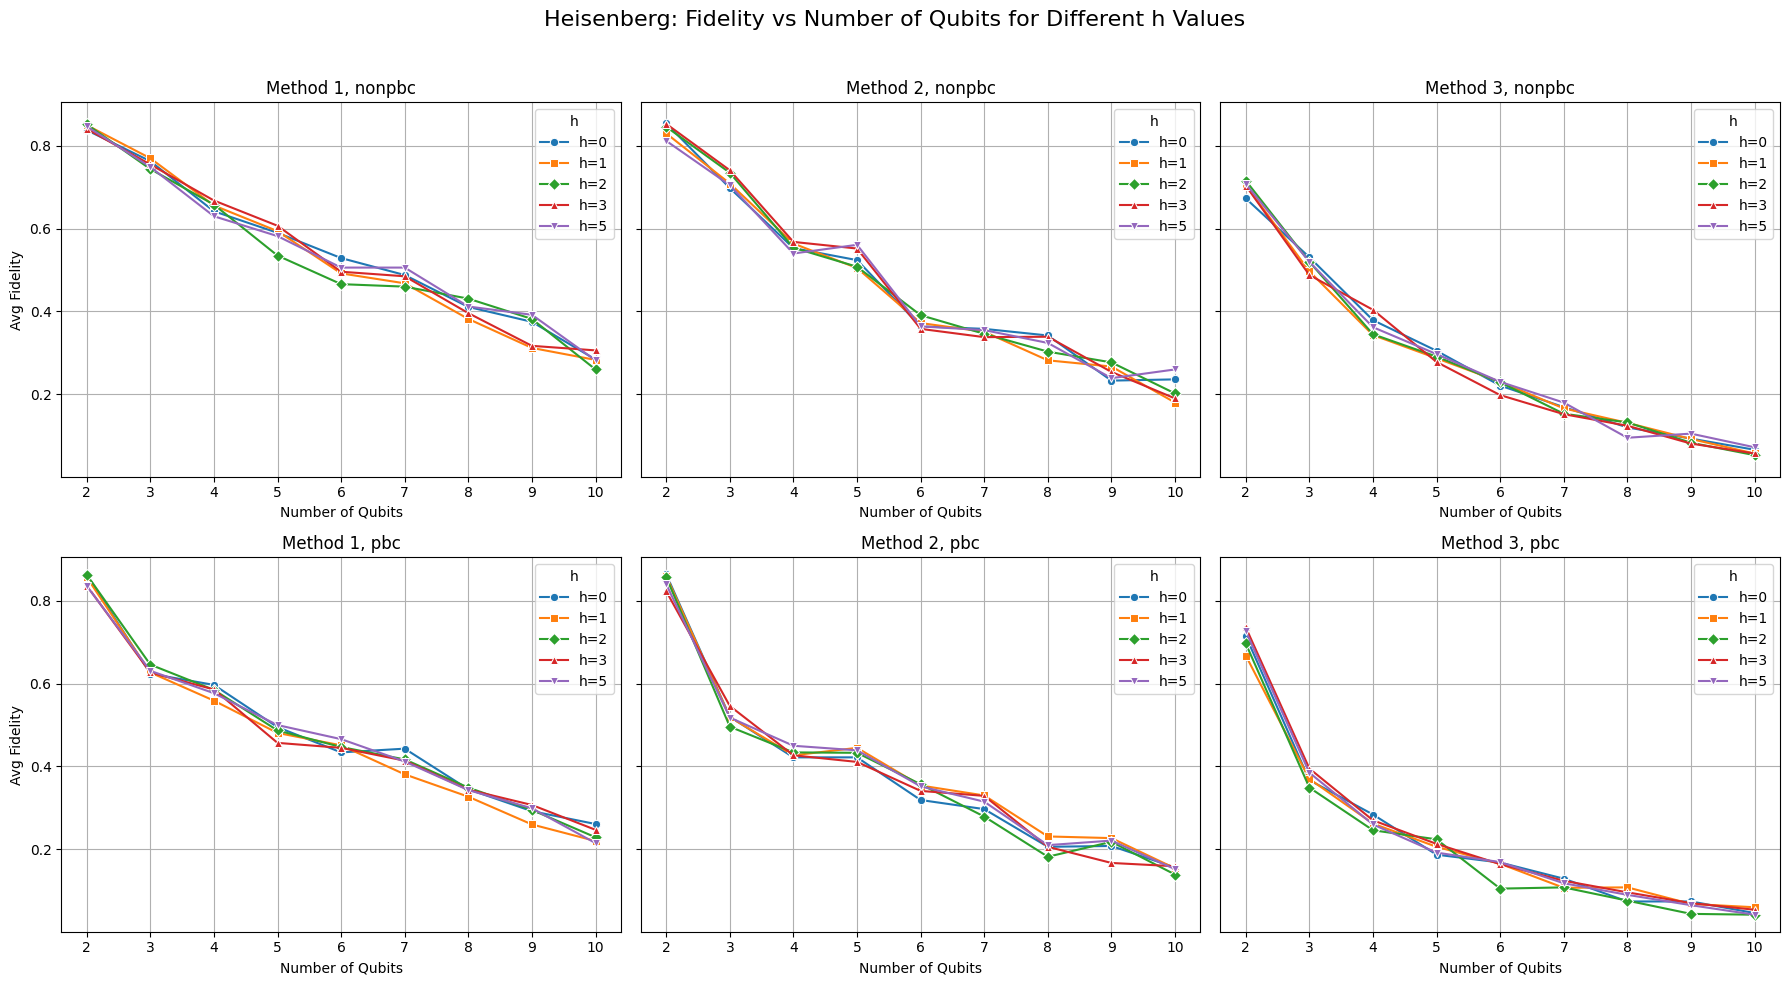

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_heis = pd.read_csv('__data/collected_data_heis.csv')

# Ensure 'group' and 'h' are treated as integers
df_heis['group'] = df_heis['group'].astype(int)
df_heis['h'] = df_heis['h'].astype(int)

# Unique methods and PBC values
methods = sorted(df_heis['method'].unique())
pbc_vals = sorted(df_heis['pbc_val'].unique())
unique_hs = sorted(df_heis['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Heisenberg: Fidelity vs Number of Qubits for Different h Values', fontsize=16)

# Define markers for distinct shapes
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H']
color_palette = sns.color_palette("tab10", len(unique_hs))

for i, pbc_val in enumerate(pbc_vals):
    for j, method in enumerate(methods):
        subset = df_heis[(df_heis['method'] == method) & (df_heis['pbc_val'] == pbc_val)]
        ax = axs[i, j]
        
        for k, h in enumerate(unique_hs):
            h_subset = subset[subset['h'] == h]
            sns.lineplot(
                data=h_subset, x='group', y='avg_fidelity', 
                marker=markers[k % len(markers)], color=color_palette[k % len(color_palette)], 
                ax=ax, label=f'h={h}'
            )
        
        ax.set_title(f'Method {method}, {pbc_val}')
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('Avg Fidelity')
        ax.legend(title='h')
        ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


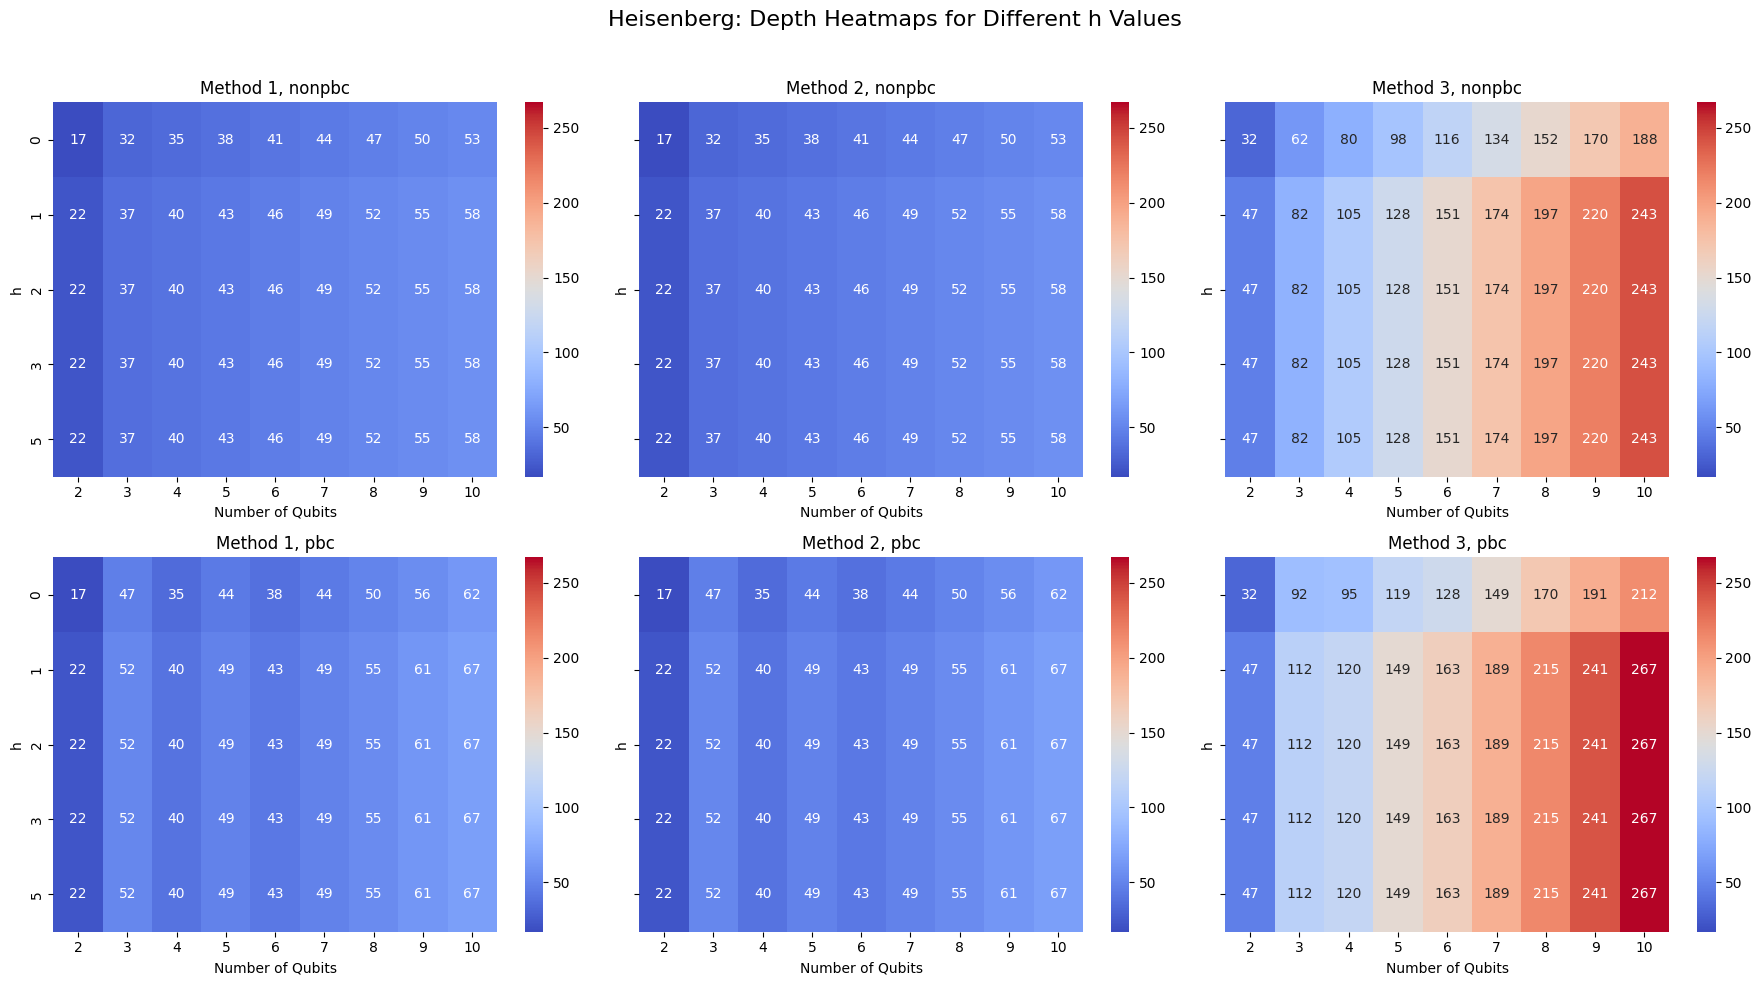

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_heis = pd.read_csv('__data/collected_data_heis.csv')

# Ensure 'group' and 'h' are treated as integers
df_heis['group'] = df_heis['group'].astype(int)
df_heis['h'] = df_heis['h'].astype(int)
df_heis['avg_depth'] = df_heis['avg_depth'].astype(int)

# Unique methods and PBC values
methods = sorted(df_heis['method'].unique())
pbc_vals = sorted(df_heis['pbc_val'].unique())

# Determine the global min and max for the heat range
vmin = df_heis['avg_depth'].min()
vmax = df_heis['avg_depth'].max()

# Set up the figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Heisenberg: Depth Heatmaps for Different h Values', fontsize=16)

for i, pbc_val in enumerate(pbc_vals):
    for j, method in enumerate(methods):
        subset = df_heis[(df_heis['method'] == method) & (df_heis['pbc_val'] == pbc_val)]
        pivot_table = subset.pivot(index="h", columns="group", values="avg_depth")
        ax = axs[i, j]
        sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", ax=ax, vmin=vmin, vmax=vmax)
        ax.set_title(f'Method {method}, {pbc_val}')
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('h')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


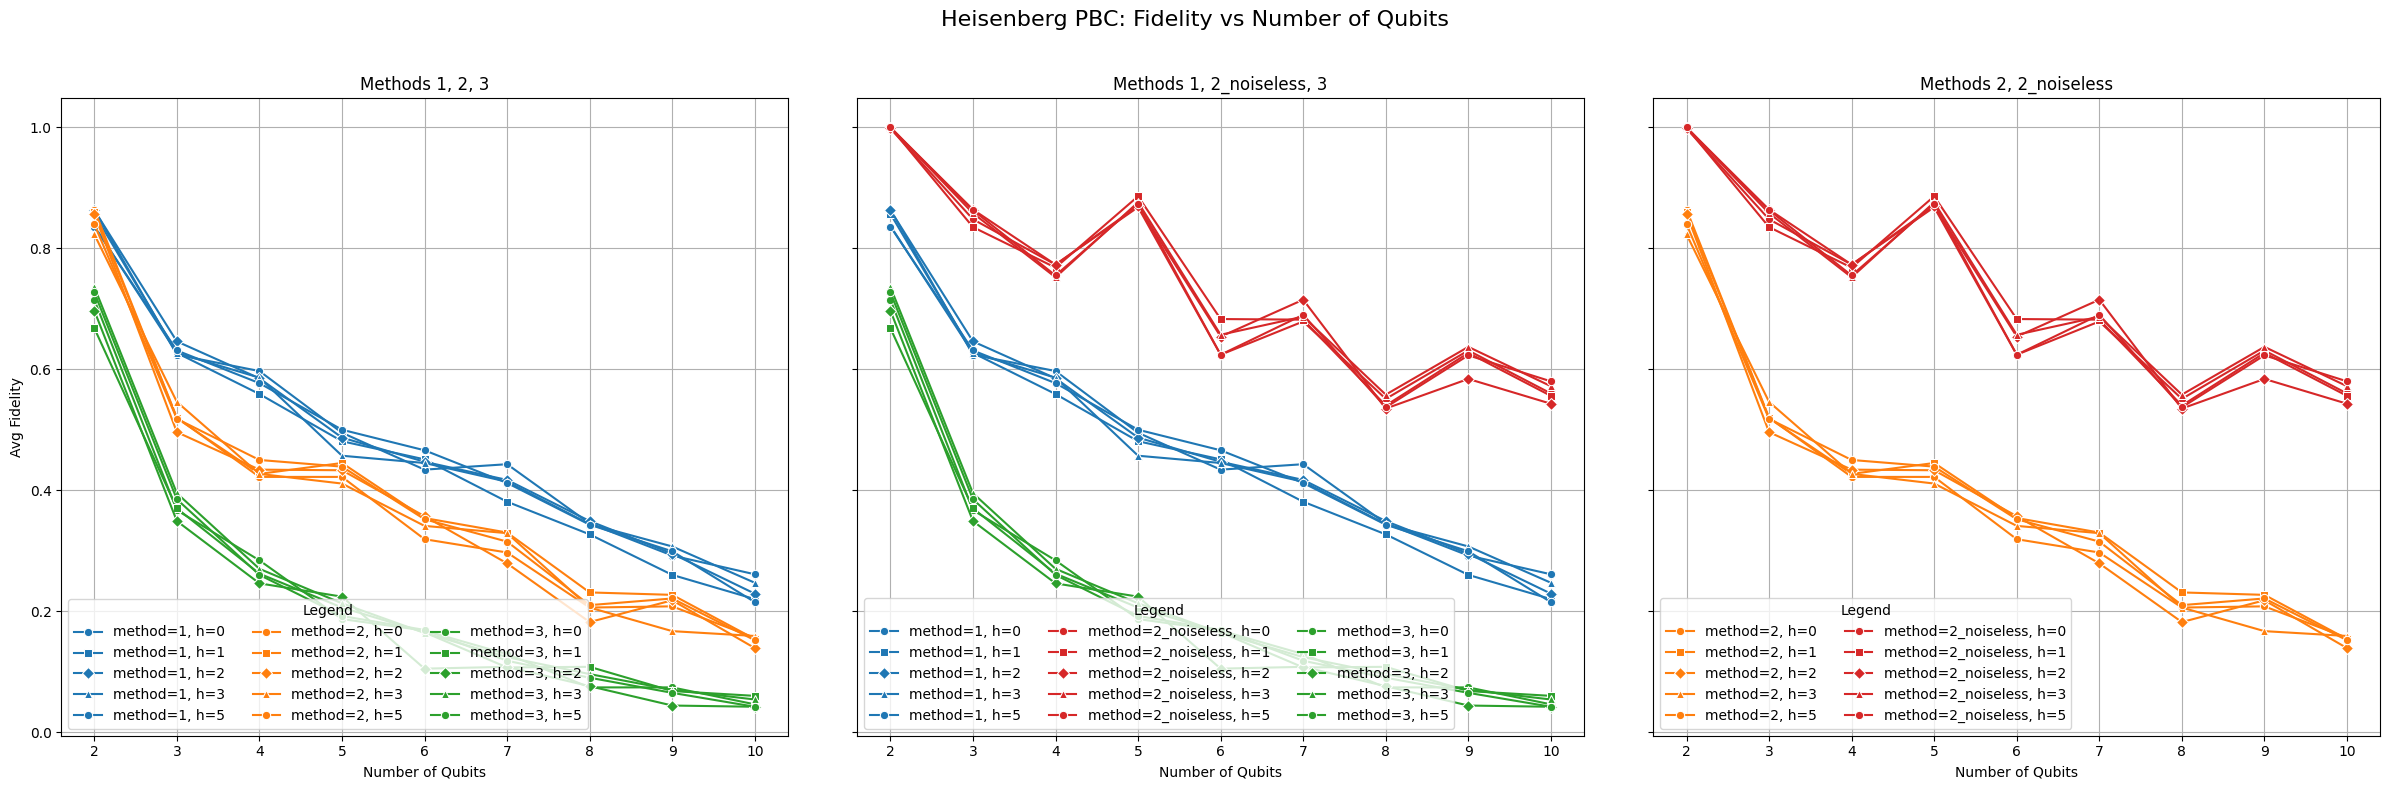

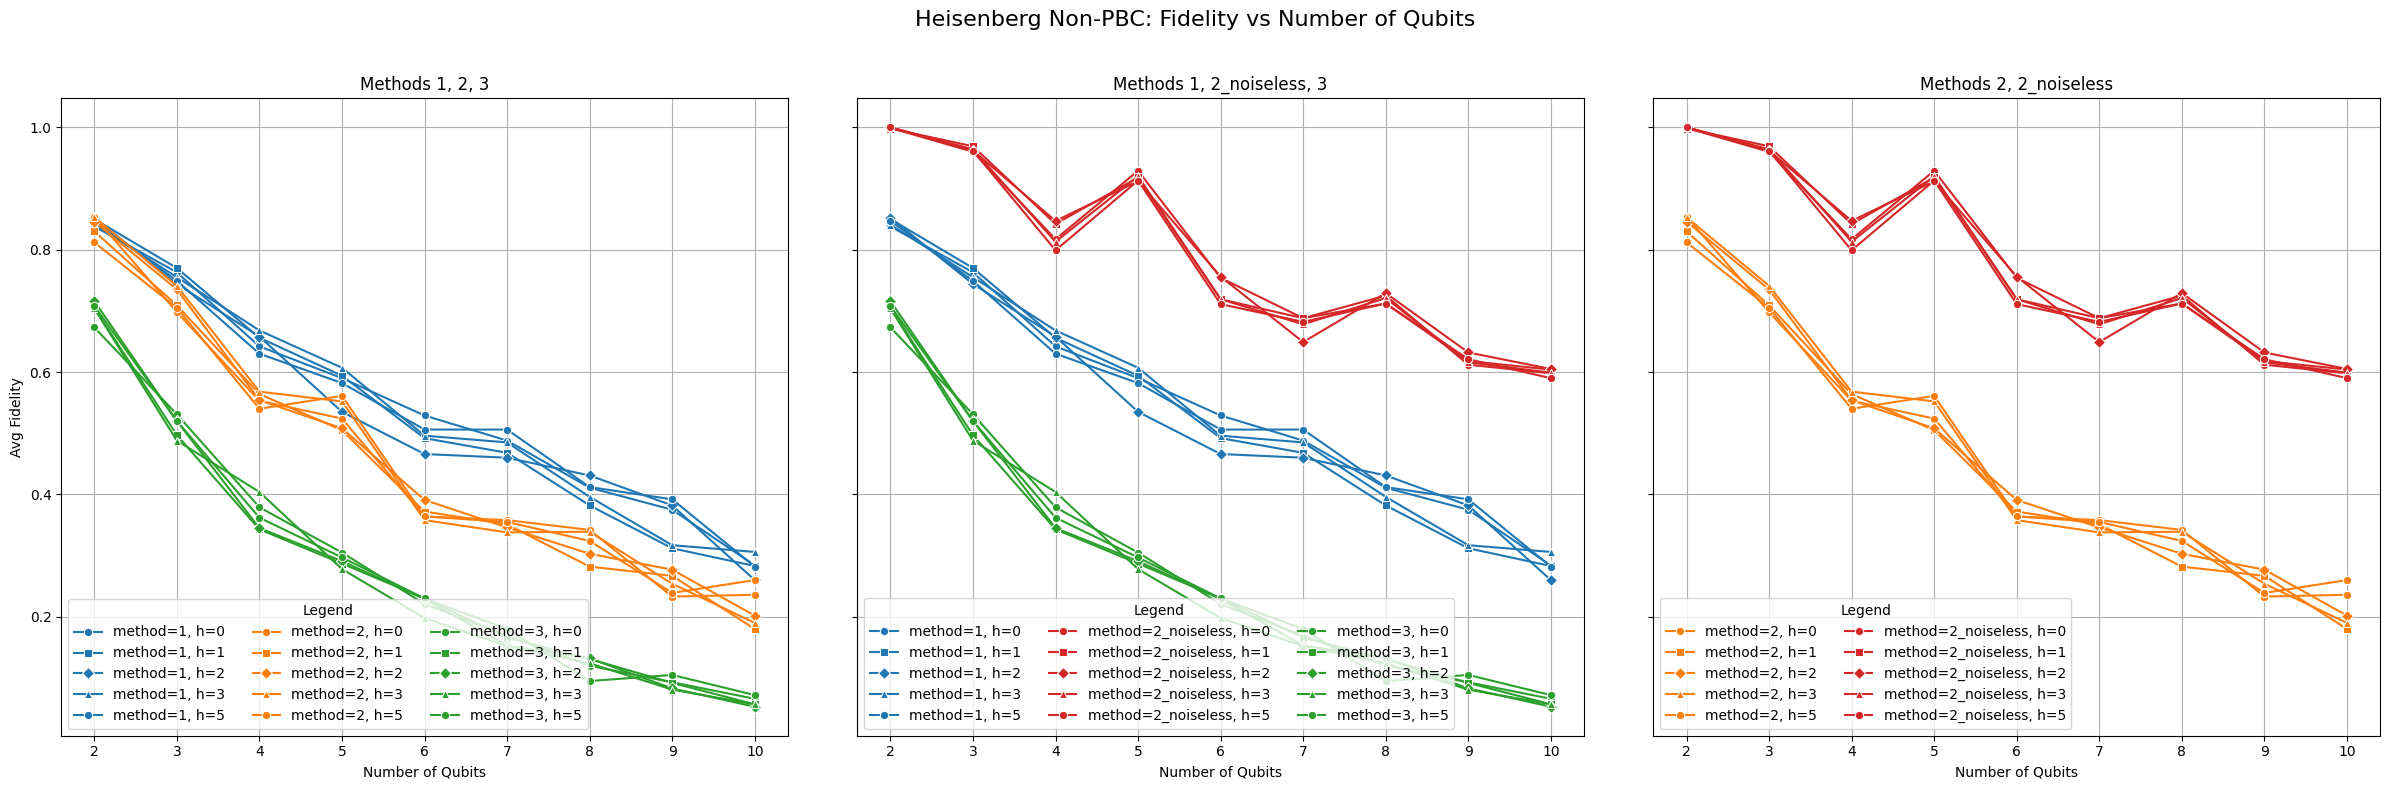

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_heis = pd.read_csv('__data/collected_data_heis.csv')
df_heis_noiseless = pd.read_csv('__data/collected_data_heis_noiseless.csv')

# Ensure 'group', 'method', and 'h' are treated as integers
df_heis['group'] = df_heis['group'].astype(int)
df_heis['method'] = df_heis['method'].astype(int)
df_heis['h'] = df_heis['h'].astype(int)
df_heis_noiseless['group'] = df_heis_noiseless['group'].astype(int)
df_heis_noiseless['method'] = df_heis_noiseless['method'].astype(int)
df_heis_noiseless['h'] = df_heis_noiseless['h'].astype(int)

# Define markers and colors
methods = ['1', '2', '3', '2_noiseless']
colors = sns.color_palette("tab10", len(methods))
h_values = sorted(df_heis['h'].unique())
markers = ['o', 's', 'D', '^', 'v']

# Define a function to plot fidelity vs number of qubits
def plot_fidelity_vs_qubits(df_noisy, df_noiseless, pbc_val, title):
    fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
    fig.suptitle(title, fontsize=16)

    plot_configurations = [
        (['1', '2', '3'], "Methods 1, 2, 3"),
        (['1', '2_noiseless', '3'], "Methods 1, 2_noiseless, 3"),
        (['2', '2_noiseless'], "Methods 2, 2_noiseless")
    ]

    for i, (methods_subset, subtitle) in enumerate(plot_configurations):
        ax = axs[i]
        subset_noisy = df_noisy[df_noisy['pbc_val'] == pbc_val]
        subset_noiseless = df_noiseless[df_noiseless['pbc_val'] == pbc_val]
        
        for method in methods_subset:
            for h in h_values:
                if 'noiseless' in method:
                    data = subset_noiseless[(subset_noiseless['method'] == int(method.split('_')[0])) & (subset_noiseless['h'] == h)]
                else:
                    data = subset_noisy[(subset_noisy['method'] == int(method)) & (subset_noisy['h'] == h)]
                
                label = f"method={method}, h={h}"
                sns.lineplot(data=data, x='group', y='avg_fidelity', marker=markers[h % len(markers)],
                             color=colors[methods.index(method)], ax=ax, label=label, errorbar=None)

        ax.set_title(subtitle)
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('Avg Fidelity')
        if i == 2:
            ax.legend(title='Legend', ncol=2, loc = 'lower left')
        else:
            ax.legend(title='Legend', ncol = 3, loc = 'lower left')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot for pbc
plot_fidelity_vs_qubits(df_heis, df_heis_noiseless, 'pbc', 'Heisenberg PBC: Fidelity vs Number of Qubits')

# Plot for non-pbc
plot_fidelity_vs_qubits(df_heis, df_heis_noiseless, 'nonpbc', 'Heisenberg Non-PBC: Fidelity vs Number of Qubits')


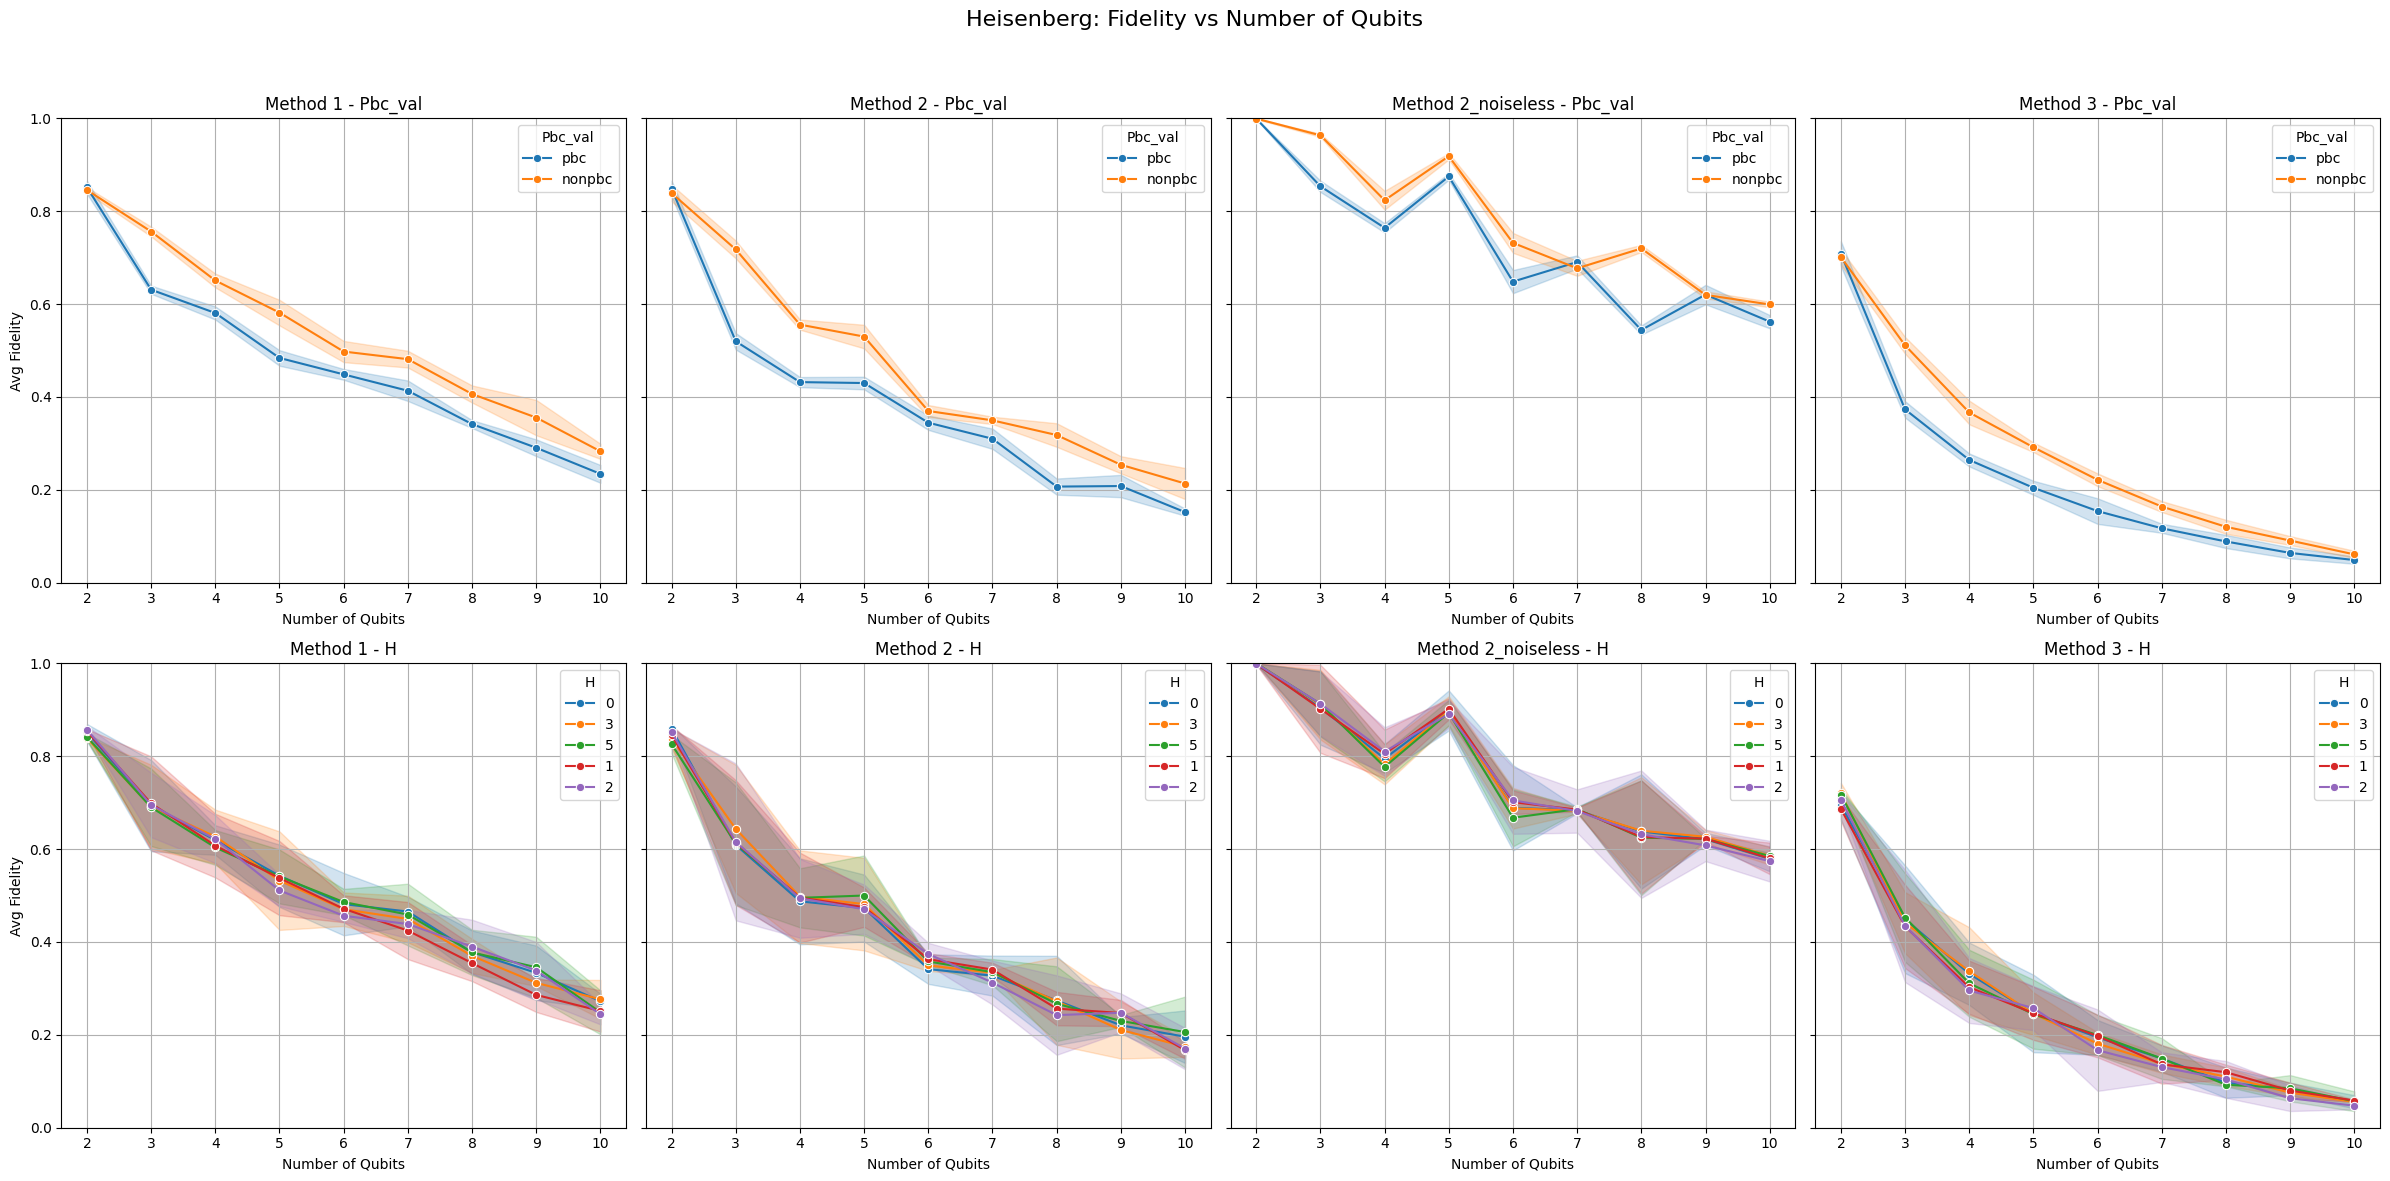

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_heis.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_heis_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_tfim_noiseless['method'] = '2_noiseless'
df_tfim['method'] = df_tfim['method'].astype(str)
df_combined = pd.concat([df_tfim, df_tfim_noiseless])

# Ensure 'group', 'h', and 'method' are treated as integers for consistency
df_combined['group'] = df_combined['group'].astype(int)
df_combined['h'] = df_combined['h'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Unique methods, pbc values, and h values
methods = ['1', '2', '2_noiseless', '3']
pbc_vals = df_combined['pbc_val'].unique()
unique_hs = sorted(df_combined['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12), sharey=True)
fig.suptitle('Heisenberg: Fidelity vs Number of Qubits', fontsize=16)

# Plotting function
def plot_subplot(ax, df, row, col, hue):
    unique_values = df[hue].unique()
    palette = sns.color_palette("tab10", len(unique_values))
    
    for color, hue_value in zip(palette, unique_values):
        subset = df[(df['method'] == col) & (df[row] == hue_value)]
        if not subset.empty:
            sns.lineplot(
                data=subset, x='group', y='avg_fidelity', label=hue_value,
                ax=ax, color=color, marker='o', errorbar='sd'
            )
            ax.set_ylim(0, 1)  # Set y-axis limits to [0, 1]
            ax.set_title(f"Method {col} - {row.capitalize()}")
            ax.set_xlabel('Number of Qubits')
            ax.set_ylabel('Avg Fidelity')
            ax.grid(True)
            ax.legend(title=hue.capitalize())

# Generate plots
for i, row in enumerate(['pbc_val', 'h']):
    for j, col in enumerate(methods):
        plot_subplot(axs[i, j], df_combined, row, col, row)

# Adjust layout to make space for legends
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


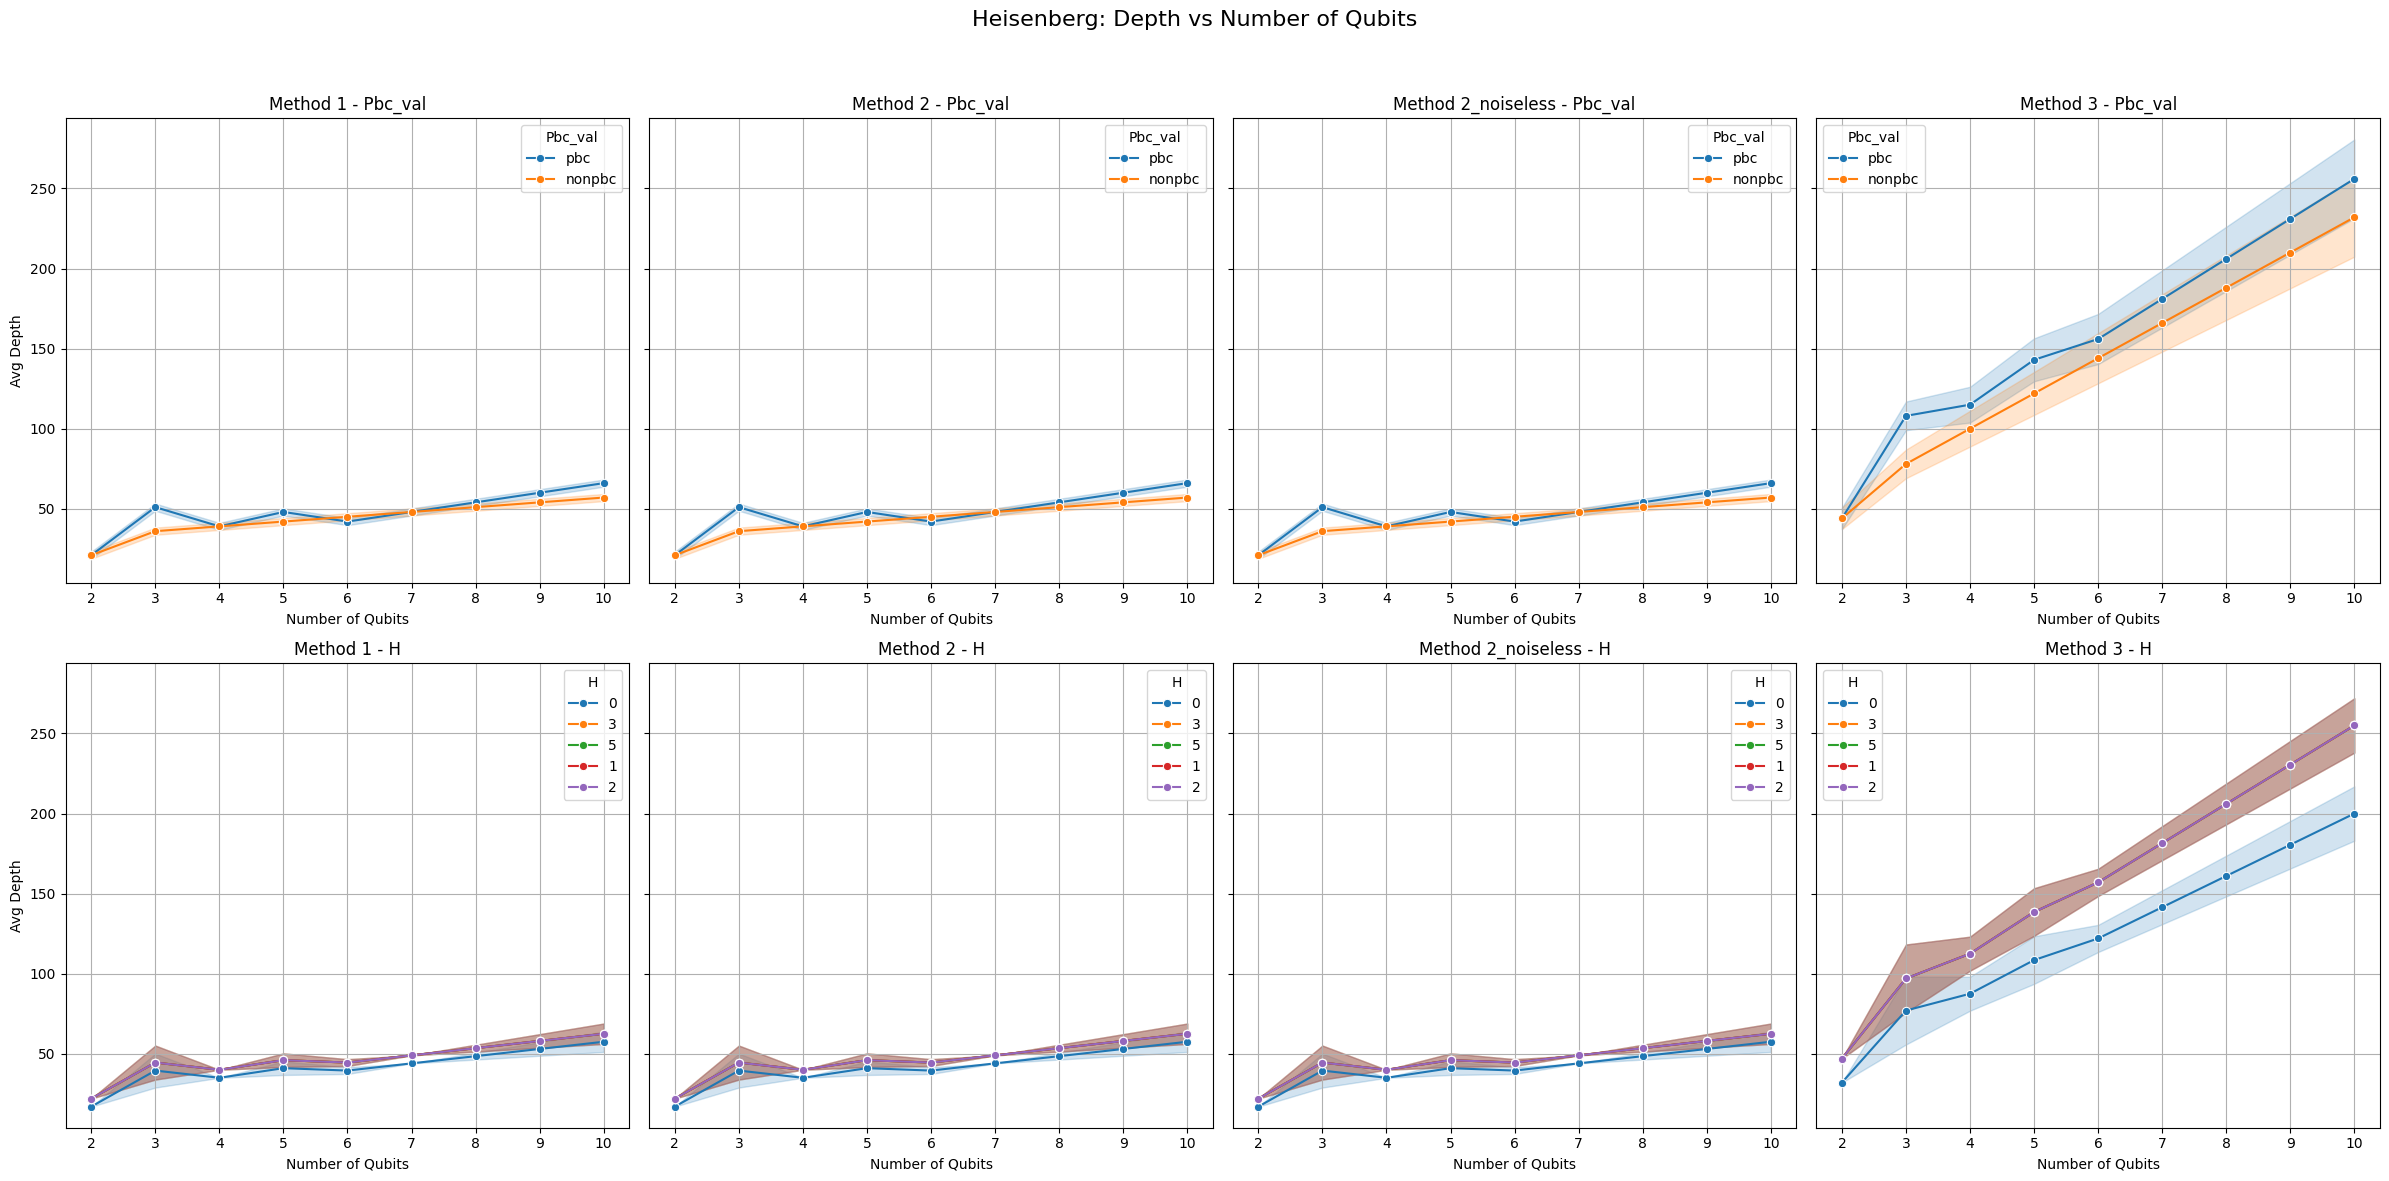

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_heis.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_heis_noiseless.csv')

# Combine noisy and noiseless data for method 2
df_tfim_noiseless['method'] = '2_noiseless'
df_tfim['method'] = df_tfim['method'].astype(str)
df_combined = pd.concat([df_tfim, df_tfim_noiseless])

# Ensure 'group', 'h', and 'method' are treated as integers for consistency
df_combined['group'] = df_combined['group'].astype(int)
df_combined['h'] = df_combined['h'].astype(int)
df_combined['method'] = df_combined['method'].astype(str)

# Unique methods, pbc values, and h values
methods = ['1', '2', '2_noiseless', '3']
pbc_vals = df_combined['pbc_val'].unique()
unique_hs = sorted(df_combined['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12), sharey=True)
fig.suptitle('Heisenberg: Depth vs Number of Qubits', fontsize=16)

# Plotting function
def plot_subplot(ax, df, row, col, hue):
    unique_values = df[hue].unique()
    palette = sns.color_palette("tab10", len(unique_values))
    
    for color, hue_value in zip(palette, unique_values):
        subset = df[(df['method'] == col) & (df[row] == hue_value)]
        if not subset.empty:
            sns.lineplot(
                data=subset, x='group', y='avg_depth', label=hue_value,
                ax=ax, color=color, marker='o', errorbar='sd'
            )
            ax.set_title(f"Method {col} - {row.capitalize()}")
            ax.set_xlabel('Number of Qubits')
            ax.set_ylabel('Avg Depth')
            ax.grid(True)
            ax.legend(title=hue.capitalize())

# Generate plots
for i, row in enumerate(['pbc_val', 'h']):
    for j, col in enumerate(methods):
        plot_subplot(axs[i, j], df_combined, row, col, row)

# Adjust layout to make space for legends
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# TFIM vs Heisenberg

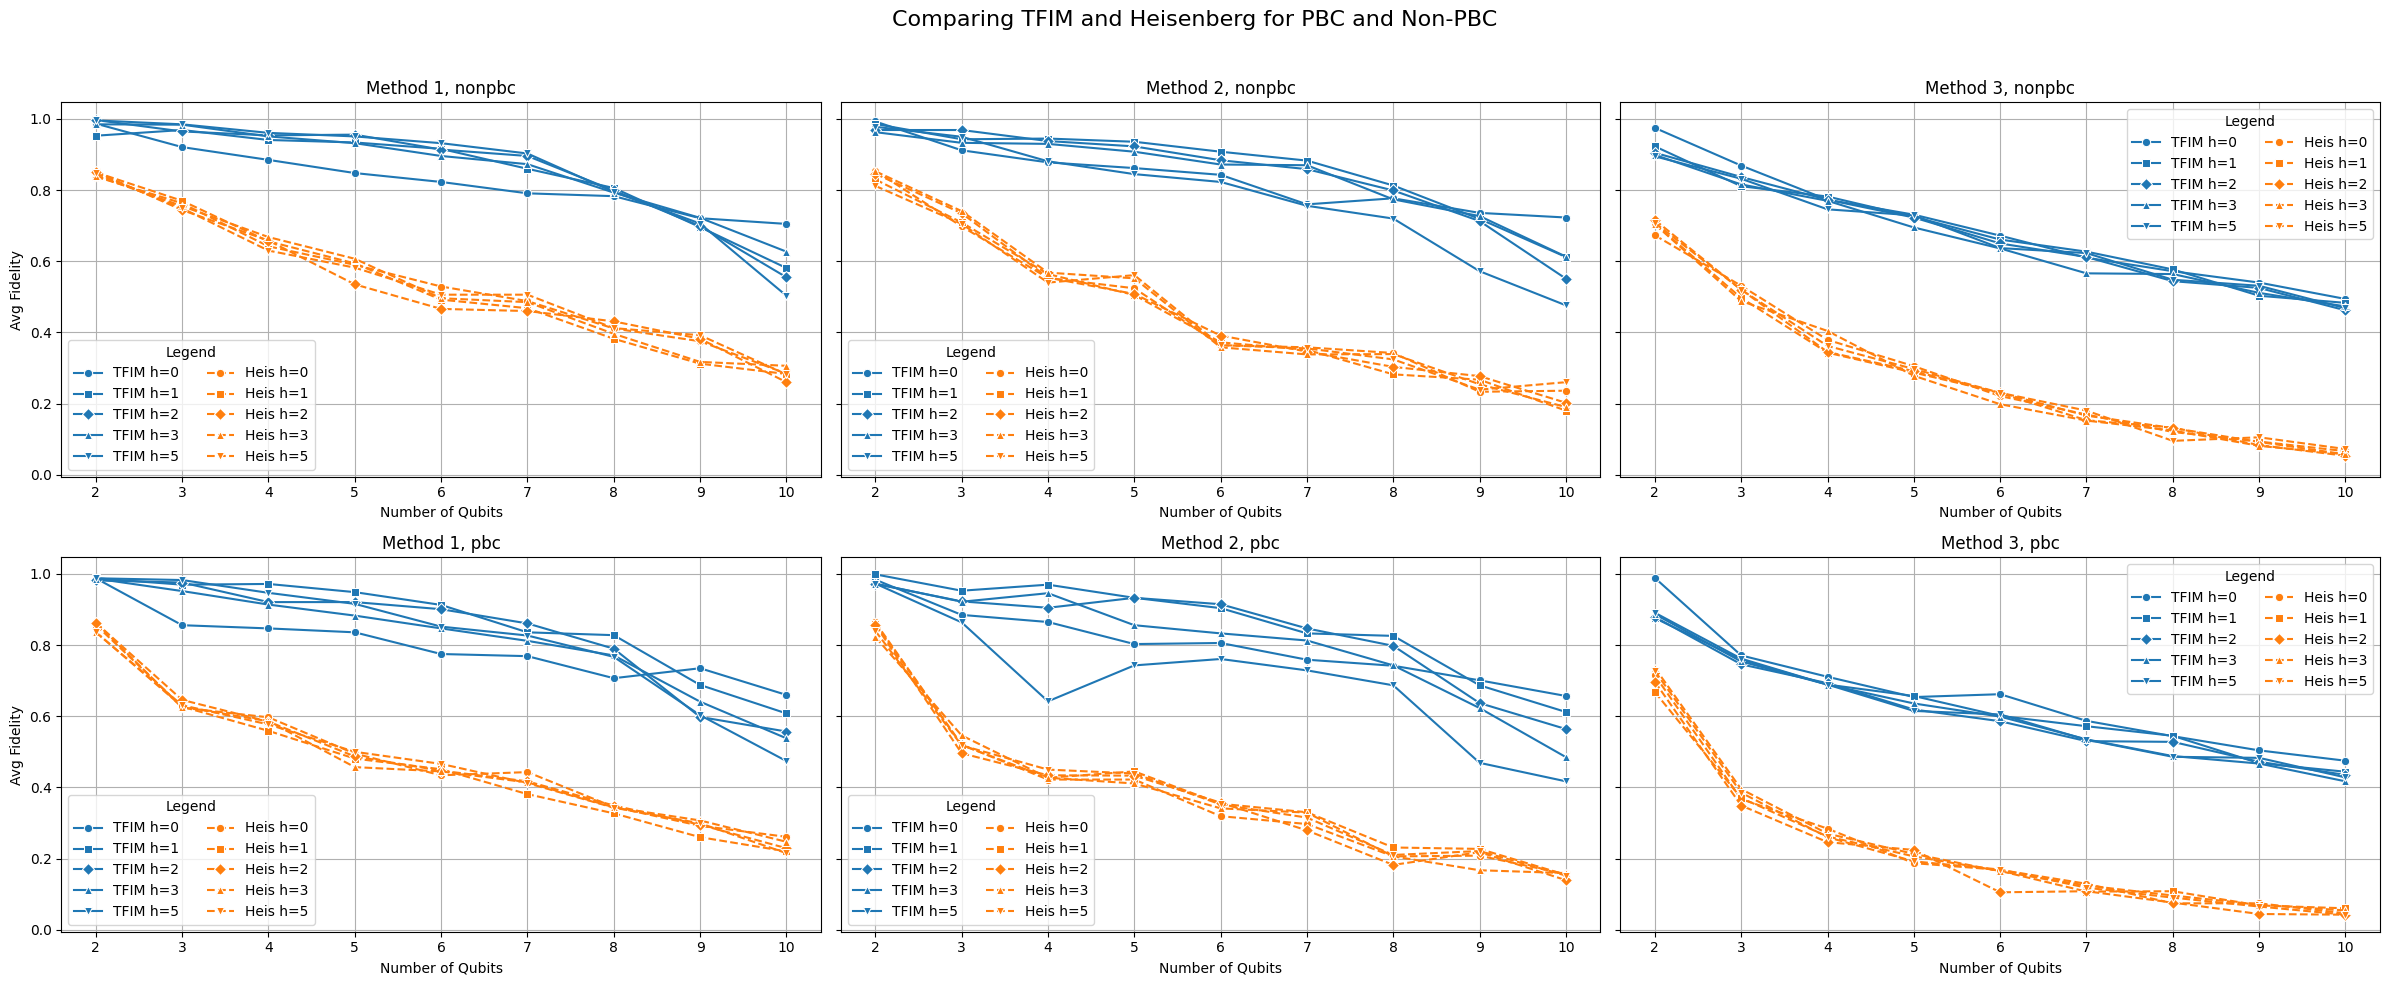

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_heis = pd.read_csv('__data/collected_data_heis.csv')

# Ensure 'group' and 'h' are treated as integers
df_tfim['group'] = df_tfim['group'].astype(int)
df_tfim['h'] = df_tfim['h'].astype(int)
df_heis['group'] = df_heis['group'].astype(int)
df_heis['h'] = df_heis['h'].astype(int)

# Filter the data to include only h values 0, 1, 2, 3, 5
h_values = [0, 1, 2, 3, 5]
df_tfim = df_tfim[df_tfim['h'].isin(h_values)]
df_heis = df_heis[df_heis['h'].isin(h_values)]

# Unique methods and PBC values
methods = sorted(df_tfim['method'].unique())
pbc_vals = sorted(df_tfim['pbc_val'].unique())
unique_hs = sorted(df_tfim['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(2, 3, figsize=(24, 10), sharey=True)
fig.suptitle('Comparing TFIM and Heisenberg for PBC and Non-PBC', fontsize=16)

# Define markers for distinct shapes
markers = ['o', 's', 'D', '^', 'v']

# Define colors for tfim and heis
tfim_color = 'tab:blue'
heis_color = 'tab:orange'

for j, method in enumerate(methods):
    for i, pbc_val in enumerate(pbc_vals):
        ax = axs[i, j]
        
        # Plot for TFIM
        subset_tfim = df_tfim[(df_tfim['method'] == method) & (df_tfim['pbc_val'] == pbc_val)]
        for k, h in enumerate(unique_hs):
            h_subset = subset_tfim[subset_tfim['h'] == h]
            sns.lineplot(
                data=h_subset, x='group', y='avg_fidelity', 
                marker=markers[k % len(markers)], color=tfim_color, 
                ax=ax, label=f'TFIM h={h}', linestyle='-'
            )
        
        # Plot for Heisenberg
        subset_heis = df_heis[(df_heis['method'] == method) & (df_heis['pbc_val'] == pbc_val)]
        for k, h in enumerate(unique_hs):
            h_subset = subset_heis[subset_heis['h'] == h]
            sns.lineplot(
                data=h_subset, x='group', y='avg_fidelity', 
                marker=markers[k % len(markers)], color=heis_color, 
                ax=ax, label=f'Heis h={h}', linestyle='--'
            )
        
        ax.set_title(f'Method {method}, {pbc_val}')
        ax.set_xlabel('Number of Qubits')
        ax.set_ylabel('Avg Fidelity')
        ax.legend(title='Legend', ncol=2)
        ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


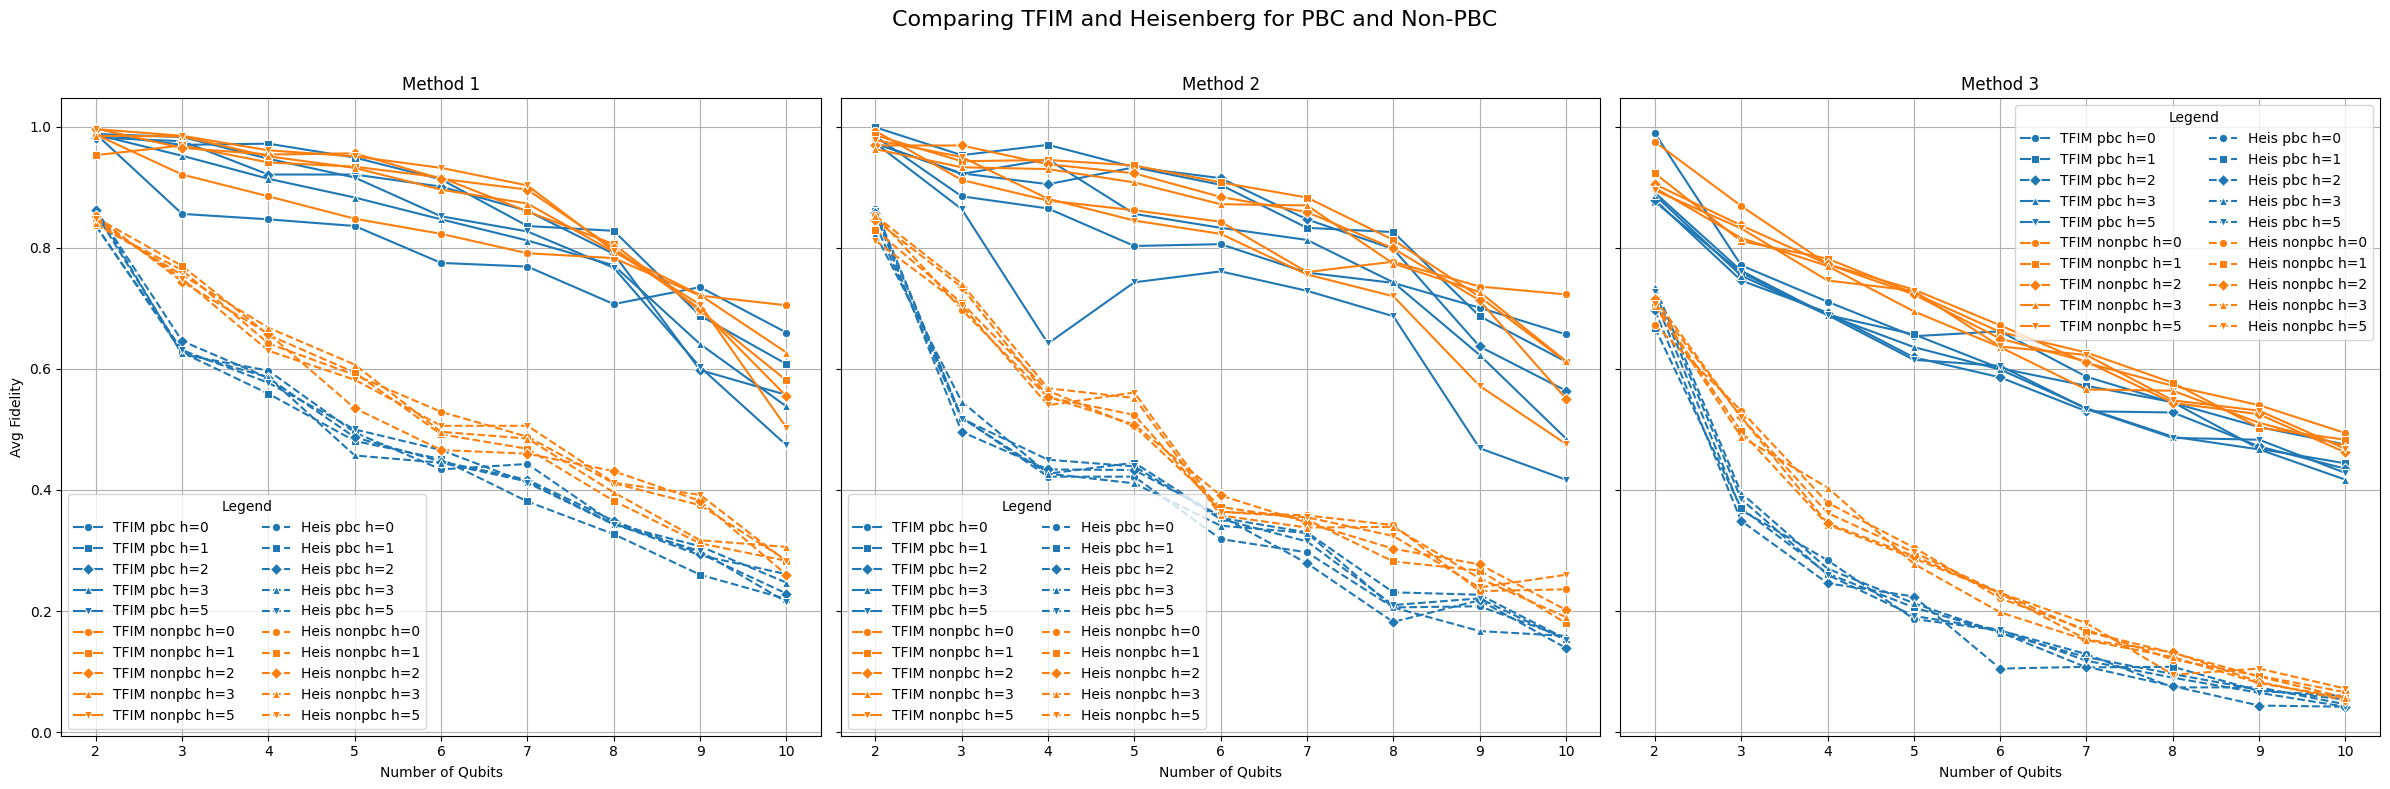

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_heis = pd.read_csv('__data/collected_data_heis.csv')

# Ensure 'group' and 'h' are treated as integers
df_tfim['group'] = df_tfim['group'].astype(int)
df_tfim['h'] = df_tfim['h'].astype(int)
df_heis['group'] = df_heis['group'].astype(int)
df_heis['h'] = df_heis['h'].astype(int)

# Filter the data to include only h values 0, 1, 2, 3, 5
h_values = [0, 1, 2, 3, 5]
df_tfim = df_tfim[df_tfim['h'].isin(h_values)]
df_heis = df_heis[df_heis['h'].isin(h_values)]

# Unique methods
methods = sorted(df_tfim['method'].unique())
unique_hs = sorted(df_tfim['h'].unique())

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
fig.suptitle('Comparing TFIM and Heisenberg for PBC and Non-PBC', fontsize=16)

# Define markers for distinct shapes
markers = ['o', 's', 'D', '^', 'v']

# Define colors for pbc and nonpbc
pbc_color = 'tab:blue'
nonpbc_color = 'tab:orange'

# Plot data
for j, method in enumerate(methods):
    ax = axs[j]

    # Plot for TFIM
    for pbc_val, color in zip(['pbc', 'nonpbc'], [pbc_color, nonpbc_color]):
        subset_tfim = df_tfim[(df_tfim['method'] == method) & (df_tfim['pbc_val'] == pbc_val)]
        for k, h in enumerate(unique_hs):
            h_subset = subset_tfim[subset_tfim['h'] == h]
            sns.lineplot(
                data=h_subset, x='group', y='avg_fidelity', 
                marker=markers[k % len(markers)], color=color, 
                ax=ax, label=f'TFIM {pbc_val} h={h}', linestyle='-'
            )

    # Plot for Heisenberg
    for pbc_val, color in zip(['pbc', 'nonpbc'], [pbc_color, nonpbc_color]):
        subset_heis = df_heis[(df_heis['method'] == method) & (df_heis['pbc_val'] == pbc_val)]
        for k, h in enumerate(unique_hs):
            h_subset = subset_heis[subset_heis['h'] == h]
            sns.lineplot(
                data=h_subset, x='group', y='avg_fidelity', 
                marker=markers[k % len(markers)], color=color, 
                ax=ax, label=f'Heis {pbc_val} h={h}', linestyle='--'
            )

    ax.set_title(f'Method {method}')
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Avg Fidelity')
    ax.legend(title='Legend', ncol=2)
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


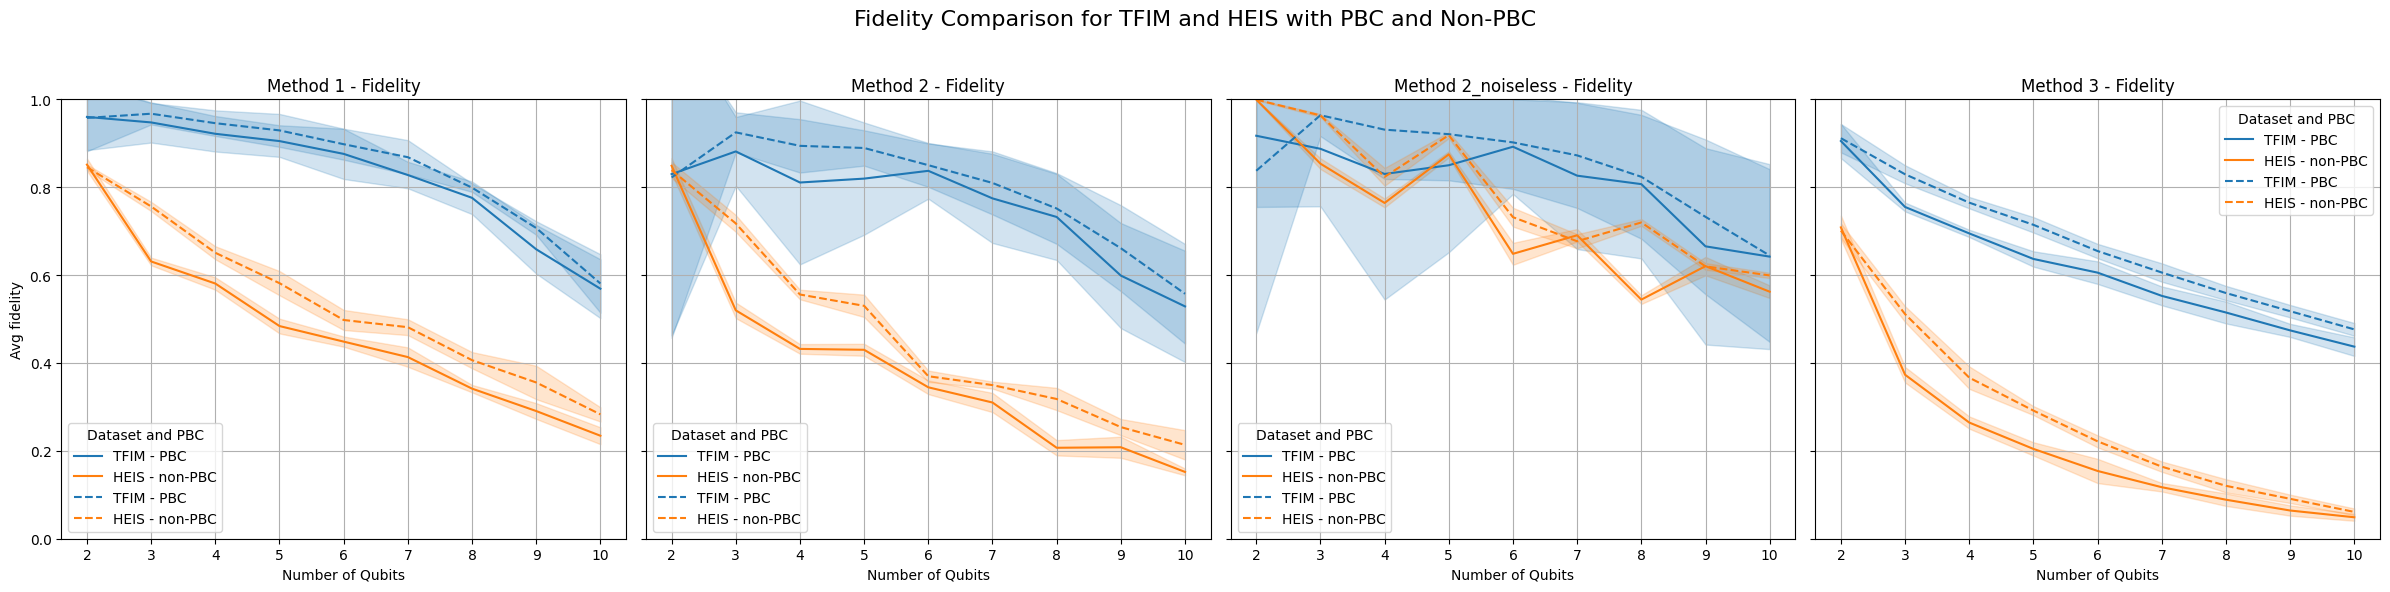

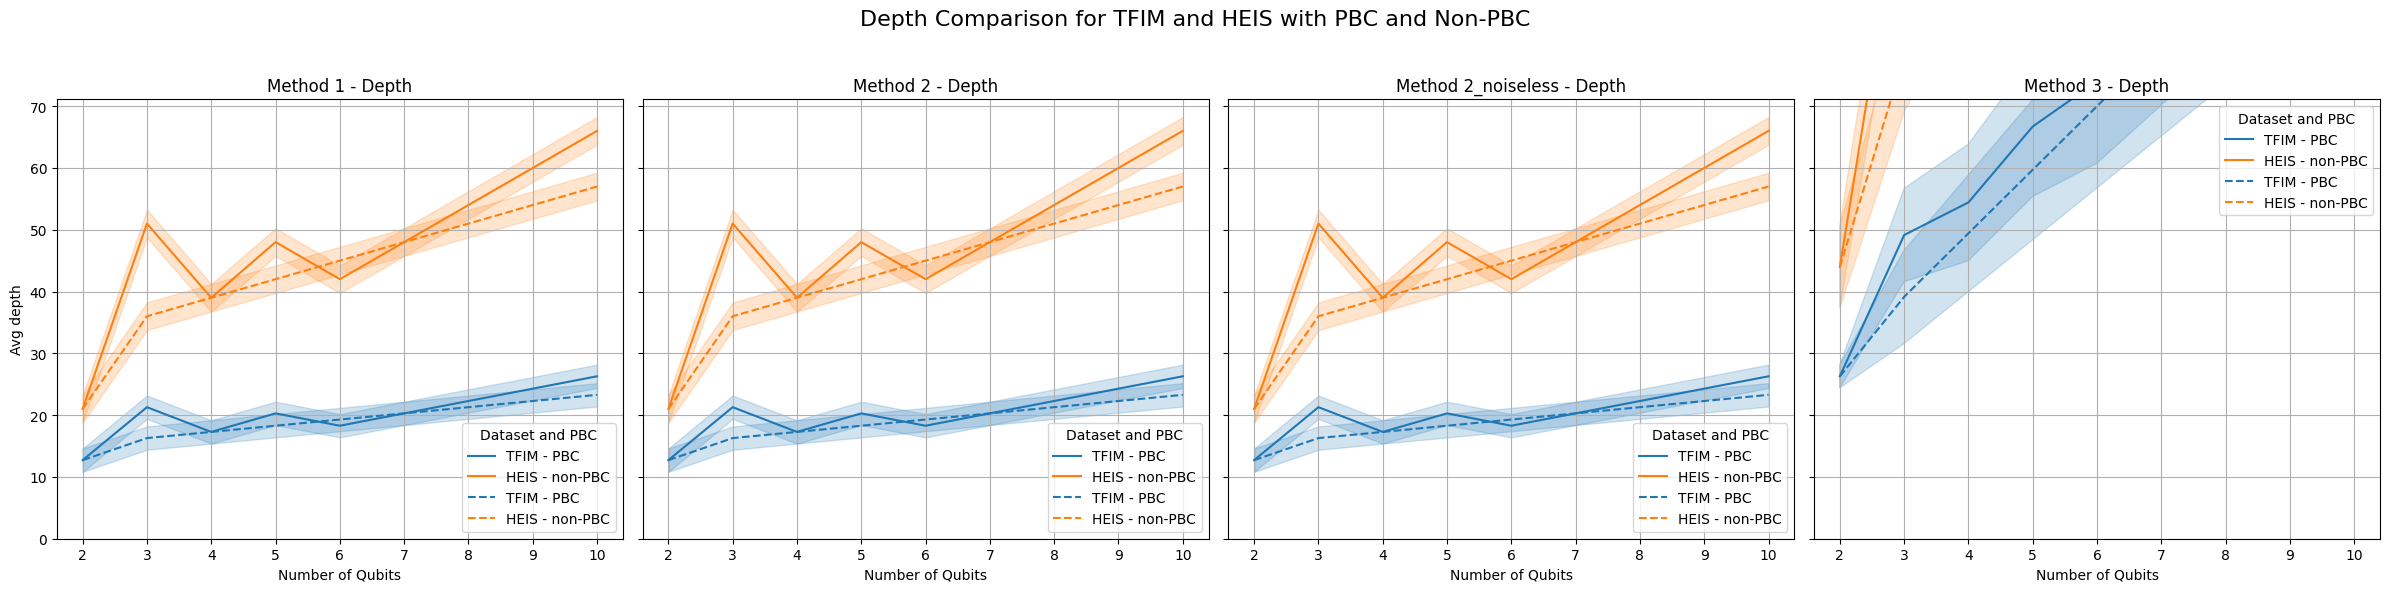

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV files
df_tfim = pd.read_csv('__data/collected_data_tfim.csv')
df_tfim_noiseless = pd.read_csv('__data/collected_data_tfim_noiseless.csv')
df_heis = pd.read_csv('__data/collected_data_heis.csv')
df_heis_noiseless = pd.read_csv('__data/collected_data_heis_noiseless.csv')

# Combine noisy and noiseless data for method 2
def combine_noisy_noiseless(df, df_noiseless):
    df_noiseless['method'] = '2_noiseless'
    df['method'] = df['method'].astype(str)
    return pd.concat([df, df_noiseless])

df_tfim_combined = combine_noisy_noiseless(df_tfim, df_tfim_noiseless)
df_heis_combined = combine_noisy_noiseless(df_heis, df_heis_noiseless)

# Ensure 'group' and 'method' are treated as integers where applicable
def preprocess(df):
    df['group'] = df['group'].astype(int)
    df['method'] = df['method'].astype(str)
    return df

df_tfim_combined = preprocess(df_tfim_combined)
df_heis_combined = preprocess(df_heis_combined)

# Combine TFIM and HEIS data into one DataFrame
df_combined = pd.concat([
    df_tfim_combined.assign(dataset='TFIM'),
    df_heis_combined.assign(dataset='HEIS')
])

# Define methods
methods = ['1', '2', '2_noiseless', '3']

# Set up the figure for subplots (Fidelity)
fig, axs = plt.subplots(1, 4, figsize=(24, 6), sharey=True)
fig.suptitle('Fidelity Comparison for TFIM and HEIS with PBC and Non-PBC', fontsize=16)

# Plotting function
def plot_subplot(ax, df, method, y_col, title):
    sns.lineplot(
        data=df[(df['method'] == method) & (df['pbc_val'] == 'pbc')], 
        x='group', y=y_col, hue='dataset', estimator='mean', errorbar='sd', 
        palette='tab10', linestyle='-', ax=ax
    ).set_label('_nolegend_')
    sns.lineplot(
        data=df[(df['method'] == method) & (df['pbc_val'] == 'nonpbc')], 
        x='group', y=y_col, hue='dataset', estimator='mean', errorbar='sd', 
        palette='tab10', linestyle='--', ax=ax
    ).set_label('_nolegend_')
    ax.set_title(title)
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel(y_col.replace('_', ' ').capitalize())
    ax.set_ylim(0, 1 if y_col == 'avg_fidelity' else None)  # Limit fidelity axis to 1
    ax.grid(True)
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [f"{label} - PBC" if i % 2 == 0 else f"{label} - non-PBC" for i, label in enumerate(labels)]
    ax.legend(handles, new_labels, title='Dataset and PBC', fontsize=10, ncol=1)

# Generate fidelity plots
for j, method in enumerate(methods):
    plot_subplot(axs[j], df_combined, method, 'avg_fidelity', f'Method {method} - Fidelity')

# Adjust layout to make space for legends
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Set up the figure for subplots (Depth)
fig, axs = plt.subplots(1, 4, figsize=(24, 6), sharey=True)
fig.suptitle('Depth Comparison for TFIM and HEIS with PBC and Non-PBC', fontsize=16)

# Generate depth plots
for j, method in enumerate(methods):
    plot_subplot(axs[j], df_combined, method, 'avg_depth', f'Method {method} - Depth')

# Adjust layout to make space for legends
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
